In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
merged_df = pd.read_csv('merged_data.csv')

In [3]:
merged_df = merged_df.sort_values(by='unix_time')


In [7]:
## Top 10 fradulent and not Fraduent job

In [7]:
df = merged_df.copy()

In [8]:
# Aggregate data to get the count of fraud and non-fraud transactions by job
fraud_data = df[df['is_fraud'] == 1]['job'].value_counts().head(10)
non_fraud_data = df[df['is_fraud'] == 0]['job'].value_counts().head(10)

# Convert the Series to DataFrames for plotting
fraud_df = fraud_data.reset_index()
fraud_df.columns = ['job', 'fraud_count']

non_fraud_df = non_fraud_data.reset_index()
non_fraud_df.columns = ['job', 'non_fraud_count']

# Altair plots
fraud_chart = alt.Chart(fraud_df).mark_bar(color='red').encode(
    x=alt.X('fraud_count:Q', title='Number of Fraudulent Transactions'),
    y=alt.Y('job:N', sort='-x', title='Job')
).properties(
    title='Top 10 Jobs Affected by Fraud'
)

non_fraud_chart = alt.Chart(non_fraud_df).mark_bar(color='green').encode(
    x=alt.X('non_fraud_count:Q', title='Number of Non-Fraudulent Transactions'),
    y=alt.Y('job:N', sort='-x', title='Job')
).properties(
    title='Top 10 Jobs with Lower Risk of Fraud'
)

# Display the charts one below the other
final_chart = alt.vconcat(fraud_chart, non_fraud_chart).properties(
    title='Comparison of Jobs by Fraud and Non-Fraud Transactions'
)

# Display the chart
final_chart

alt.VConcatChart(...)

In [9]:
fraudulent_transactions = df[df['is_fraud'] == 1].groupby('job')['amt'].max()
fraudulent_transactions

job
Accommodation manager                   1065.32
Accountant, chartered                    997.13
Accountant, chartered management        1122.84
Accountant, chartered public finance    1169.32
Accounting technician                    430.06
                                         ...   
Water engineer                          1073.43
Water quality scientist                  952.71
Wellsite geologist                      1027.25
Writer                                  1116.86
Youth worker                            1090.76
Name: amt, Length: 329, dtype: float64

In [10]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob'],
      dtype='object')

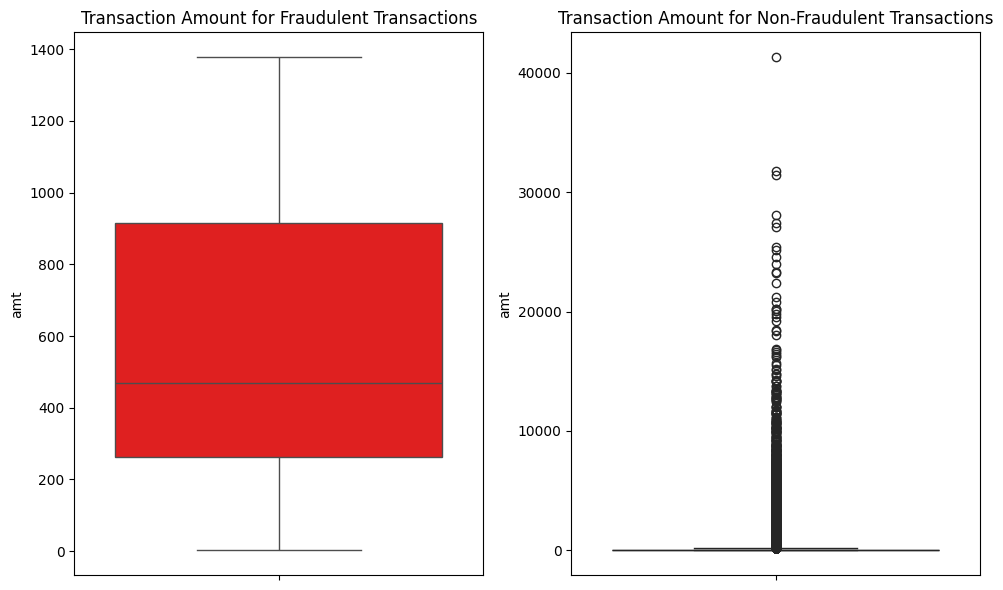

In [11]:
import seaborn as sns
# Create separate DataFrames for fraud and non-fraud transactions
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Plotting
plt.figure(figsize=(10, 6))

# Box plot for fraud transactions
plt.subplot(1, 2, 1)
sns.boxplot(y='amt', data=fraud_df, color='red')
plt.title('Transaction Amount for Fraudulent Transactions')

# Box plot for non-fraud transactions
plt.subplot(1, 2, 2)
sns.boxplot(y='amt', data=non_fraud_df, color='green')
plt.title('Transaction Amount for Non-Fraudulent Transactions')

plt.tight_layout()
plt.show()

Remarks:

Fradulent transaction are made in small amount, however the non fradulent transaction amount is very high.

In [6]:
merged_df.head()

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
326123,3600515,213140433504880,280173576486,a410f9d17a82d616d248d0e65c58420f,1546261219,gas_transport,209.83,0,Peterson LLC,39.665260,...,F,07522 Richardson Prairie,Reading,PA,19608,40.3113,-76.0345,213013,Fisheries officer,1989-03-06
2276137,1624030,571945341956,41019526172,ba8e37ae12a9b7fe62ed317523c1b702,1546261223,gas_transport,110.47,0,"Perez, Young and Stanley",29.833943,...,F,447 Marsh Heights,Channelview,TX,77530,29.7914,-95.1317,31086,"Conservation officer, historic buildings",1956-05-05
2475846,1827323,372853533998243,467846623753,bf3e9ab9554652fcd8e0a50ba8dd1d91,1546261297,gas_transport,9.53,0,Trujillo-Foley,29.400998,...,M,77580 Erin Plains,San Antonio,TX,78245,29.4189,-98.6895,1595797,"Geologist, wellsite",1985-04-12
1450355,1253609,676305937770,661384884419,f303afd08e32a5046250692754d73c6c,1546261363,gas_transport,199.74,0,Hatfield Group,34.317132,...,M,832 Gabriela Run,Fallbrook,CA,92028,33.3690,-117.2290,46239,"Designer, television/film set",1929-11-07
2630160,1950815,3501842933598479,272098683812,69f35ab9a3bb604d0b4730172cbc6dec,1546261447,gas_transport,122.21,0,Clark Group,33.607133,...,M,596 Buck Orchard,Dallas,TX,75216,32.7086,-96.7955,1263321,Publishing rights manager,1982-09-19


In [10]:
merged_df.head().T

,326123,2276137,2475846,1450355,2630160
Unnamed: 0,3600515,1624030,1827323,1253609,1950815
cc_num,213140433504880,571945341956,372853533998243,676305937770,3501842933598479
acct_num,280173576486,41019526172,467846623753,661384884419,272098683812
trans_num,a410f9d17a82d616d248d0e65c58420f,ba8e37ae12a9b7fe62ed317523c1b702,bf3e9ab9554652fcd8e0a50ba8dd1d91,f303afd08e32a5046250692754d73c6c,69f35ab9a3bb604d0b4730172cbc6dec
unix_time,1546261219,1546261223,1546261297,1546261363,1546261447
category,gas_transport,gas_transport,gas_transport,gas_transport,gas_transport
amt,209.83,110.47,9.53,199.74,122.21
is_fraud,0,0,0,0,0
merchant,Peterson LLC,"Perez, Young and Stanley",Trujillo-Foley,Hatfield Group,Clark Group
merch_lat,39.66526,29.833943,29.400998,34.317132,33.607133


In [12]:
from datetime import datetime

merged_df['datetime'] = pd.to_datetime(merged_df['unix_time'], unit='s')

# Extract year, month, day, hour, minute, and second
merged_df['year'] = merged_df['datetime'].dt.year
merged_df['month'] = merged_df['datetime'].dt.month
merged_df['day'] = merged_df['datetime'].dt.day
merged_df['hour'] = merged_df['datetime'].dt.hour
merged_df['minute'] = merged_df['datetime'].dt.minute
merged_df['second'] = merged_df['datetime'].dt.second

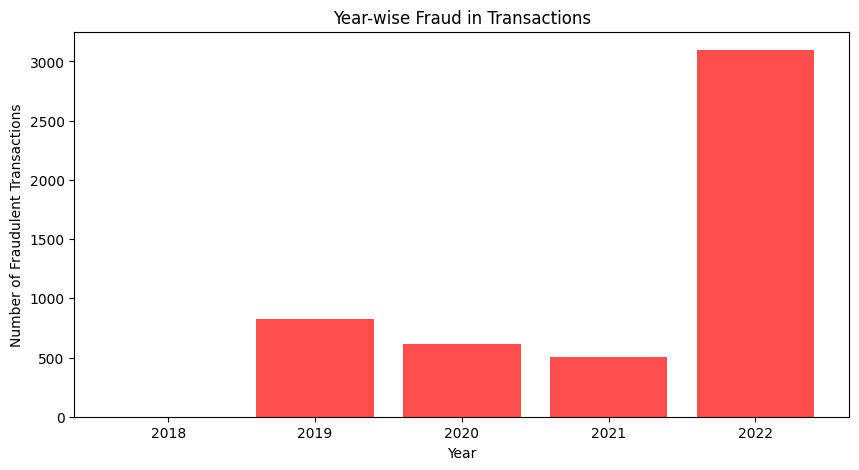

In [14]:
# Group by year and aggregate the fraud data
yearly_fraud = merged_df.groupby('year')['is_fraud'].sum().reset_index()

# Plot the year-wise fraud data
plt.figure(figsize=(10, 5))
plt.bar(yearly_fraud['year'], yearly_fraud['is_fraud'], color='red', alpha=0.7)
plt.title('Year-wise Fraud in Transactions')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(yearly_fraud['year'])  # Ensure each year is labeled on the x-axis
plt.show()

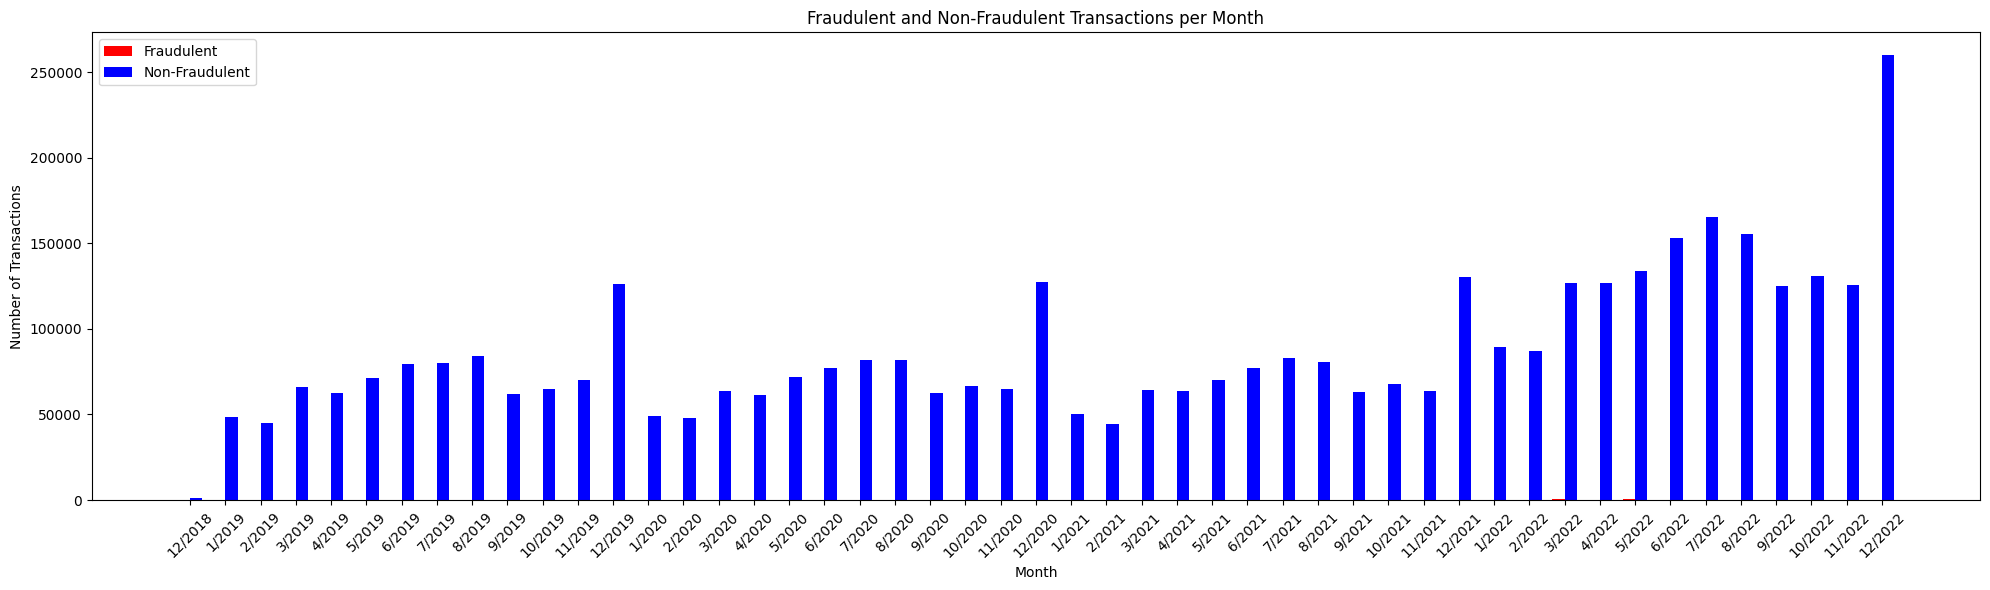

In [33]:
# Group by year and month and aggregate the fraud data
monthly_fraud = merged_df.groupby(['year', 'month', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

# Plot both fraudulent and non-fraudulent transactions for each month
plt.figure(figsize=(20, 6))

# Bar width
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(monthly_fraud))

# Plotting fraudulent transactions
plt.bar(index, monthly_fraud[1], bar_width, color='red', label='Fraudulent')

# Plotting non-fraudulent transactions
plt.bar(index + bar_width, monthly_fraud[0], bar_width, color='blue', label='Non-Fraudulent')

# Labeling
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Fraudulent and Non-Fraudulent Transactions per Month')
plt.xticks(index + bar_width / 2, [f"{month[1]}/{month[0]}" for month in monthly_fraud.index], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


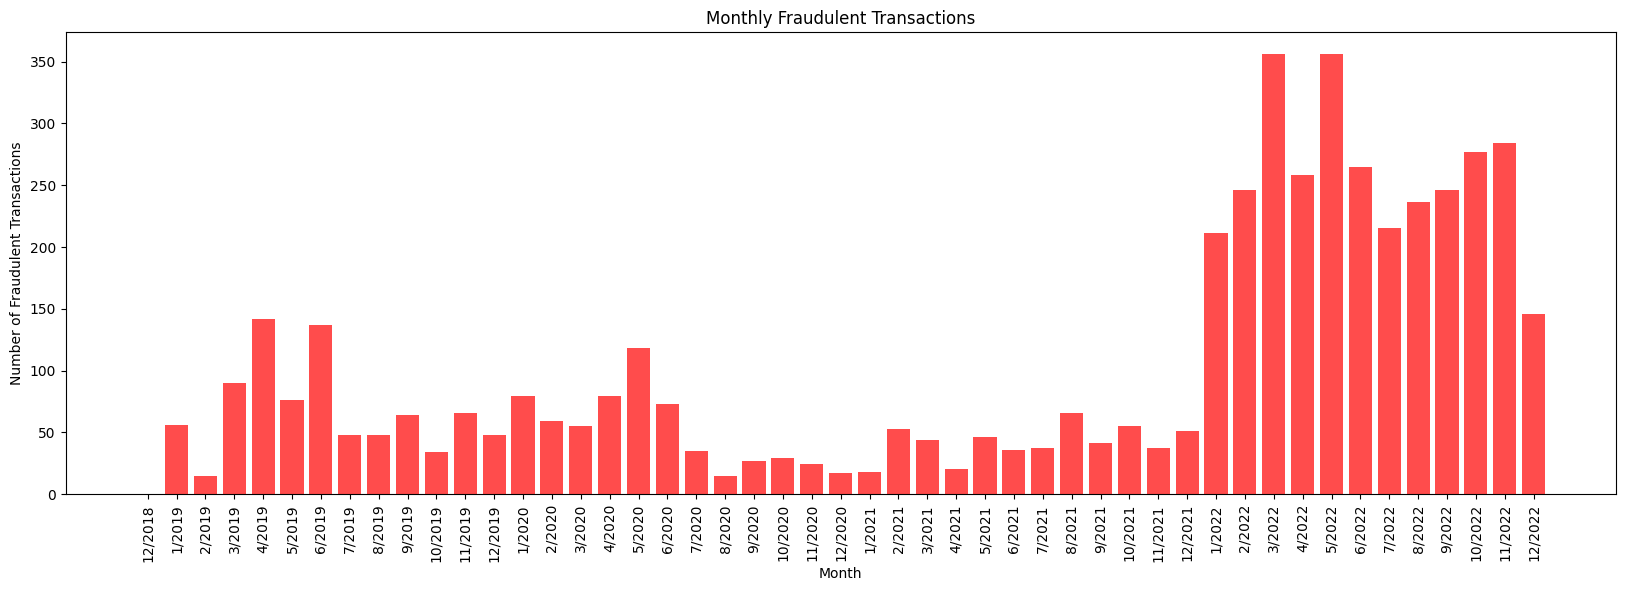

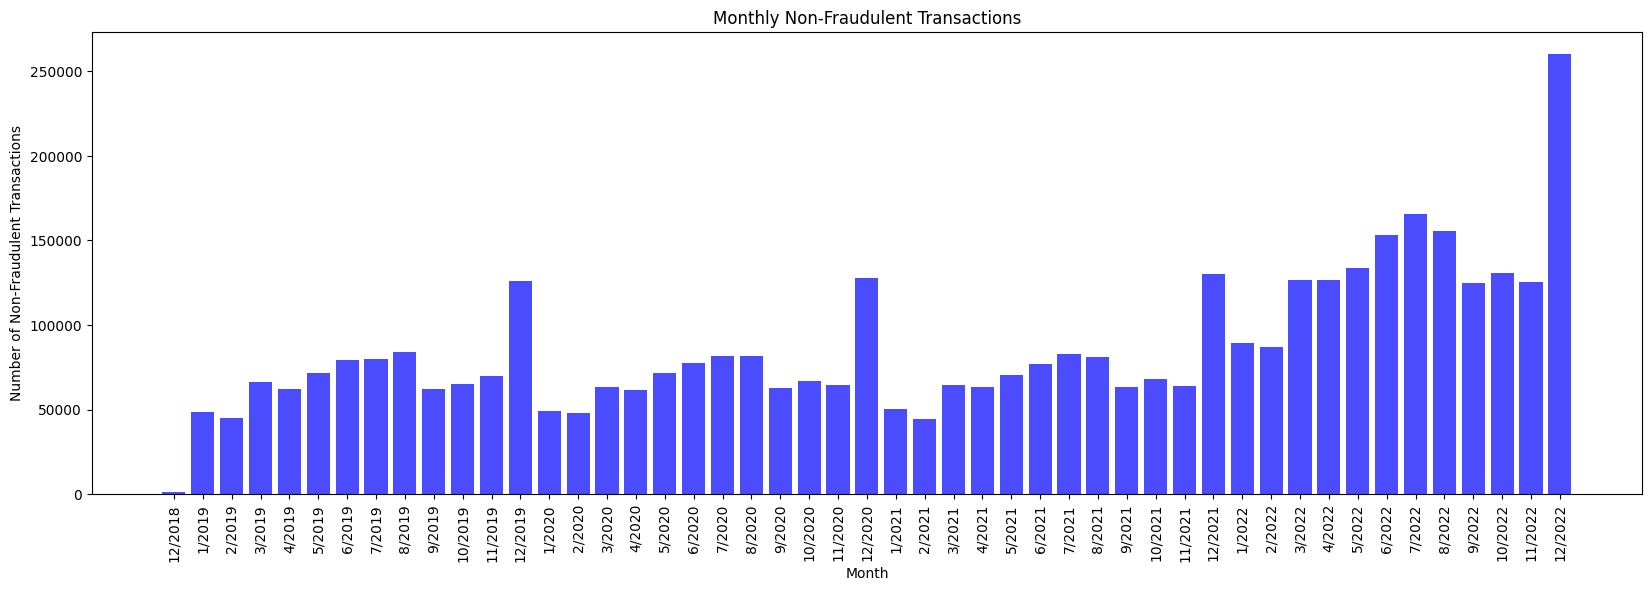

In [39]:
# Group by year and month and aggregate the fraud data
monthly_fraud = merged_df.groupby(['year', 'month', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

# Convert index to strings for compatibility
monthly_fraud.index = [f"{month[1]}/{month[0]}" for month in monthly_fraud.index]

# Plot fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[1], color='red', alpha=0.7)
plt.title('Monthly Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

# Plot non-fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[0], color='blue', alpha=0.7)
plt.title('Monthly Non-Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()


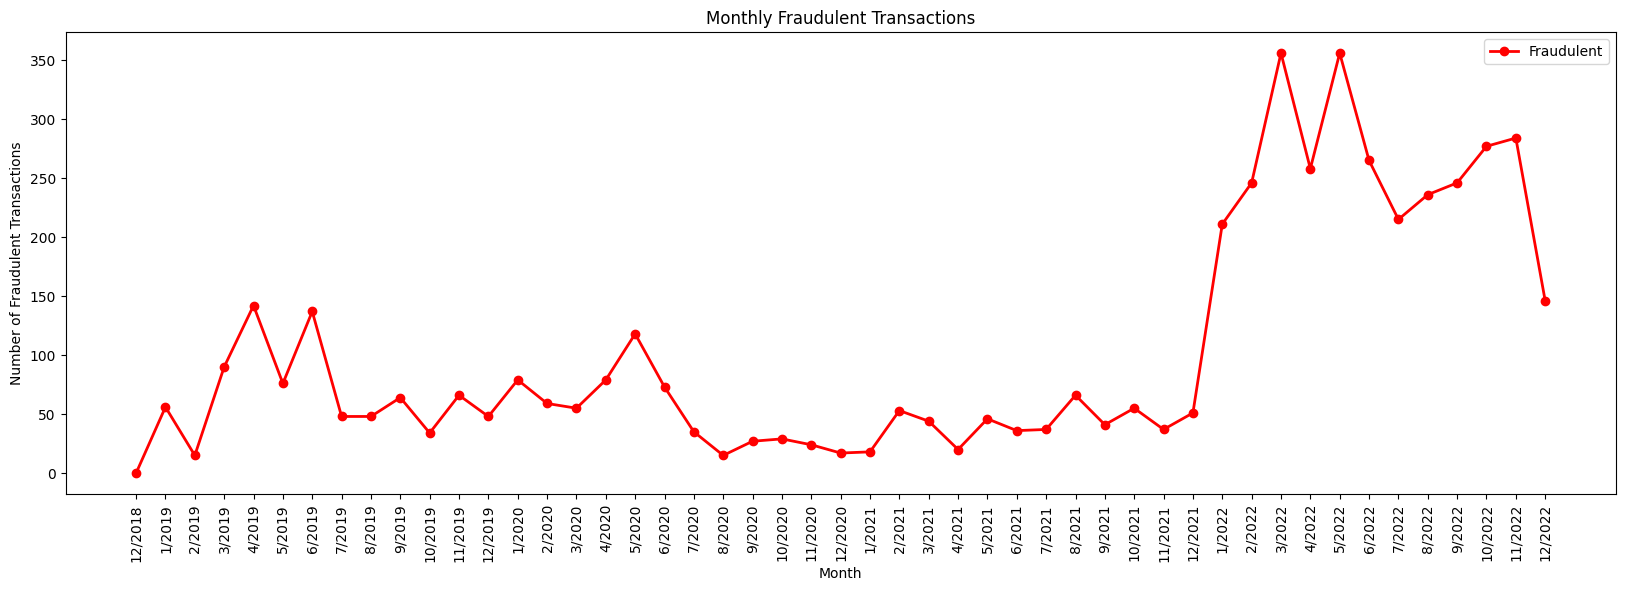

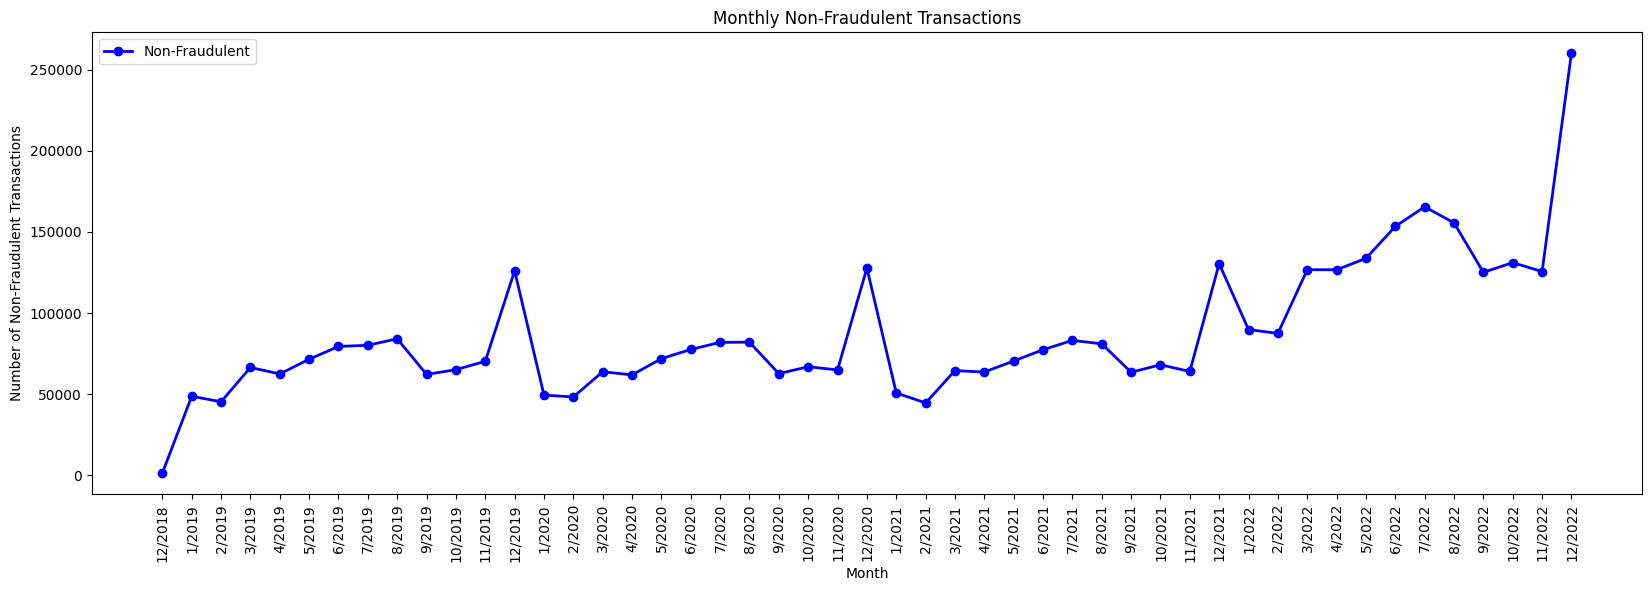

In [38]:
# Plot fraudulent transactions
plt.figure(figsize=(20, 6))
plt.plot(monthly_fraud.index, monthly_fraud[1], color='red', marker='o', linestyle='-', linewidth=2, label='Fraudulent')
plt.title('Monthly Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.legend()
# plt.grid(True)
plt.show()

# Plot non-fraudulent transactions
plt.figure(figsize=(20, 6))
plt.plot(monthly_fraud.index, monthly_fraud[0], color='blue', marker='o', linestyle='-', linewidth=2, label='Non-Fraudulent')
plt.title('Monthly Non-Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(rotation=90)
plt.legend()
# plt.grid(True)
plt.show()


In [250]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,4260904.0,2130451.5,0.0,1065225.75,2130451.5,3195677.25,4260903.0,1230017.180033
cc_num,4260904.0,391681053519475584.0,60400268763.0,180061770673683.0,3524238397283398.0,4604409079772781.0,4986226992066618368.0,1267804706144145408.0
acct_num,4260904.0,491359923584.885742,2348758451.0,256845189467.0,471931004367.0,751851133791.0,999389892260.0,289774948216.733337
unix_time,4260904.0,1620227935.615535,1546261219.0,1587482349.0,1626431248.0,1654917845.0,1672491582.0,37952279.353793
amt,4260904.0,68.987896,1.0,9.1,44.49,81.58,41300.53,161.846724
is_fraud,4260904.0,0.001181,0.0,0.0,0.0,0.0,1.0,0.034352
merch_lat,4260904.0,37.352755,18.590006,33.701382,38.193655,41.205668,65.776098,5.50463
merch_long,4260904.0,-92.476105,-160.367675,-99.030716,-87.274451,-79.660981,-67.246316,17.416033
zip,4260904.0,51903.842738,1571.0,27505.0,49202.0,78704.0,99705.0,29967.203497
lat,4260904.0,37.352687,19.5893,33.7836,38.242,40.982,64.7805,5.474364


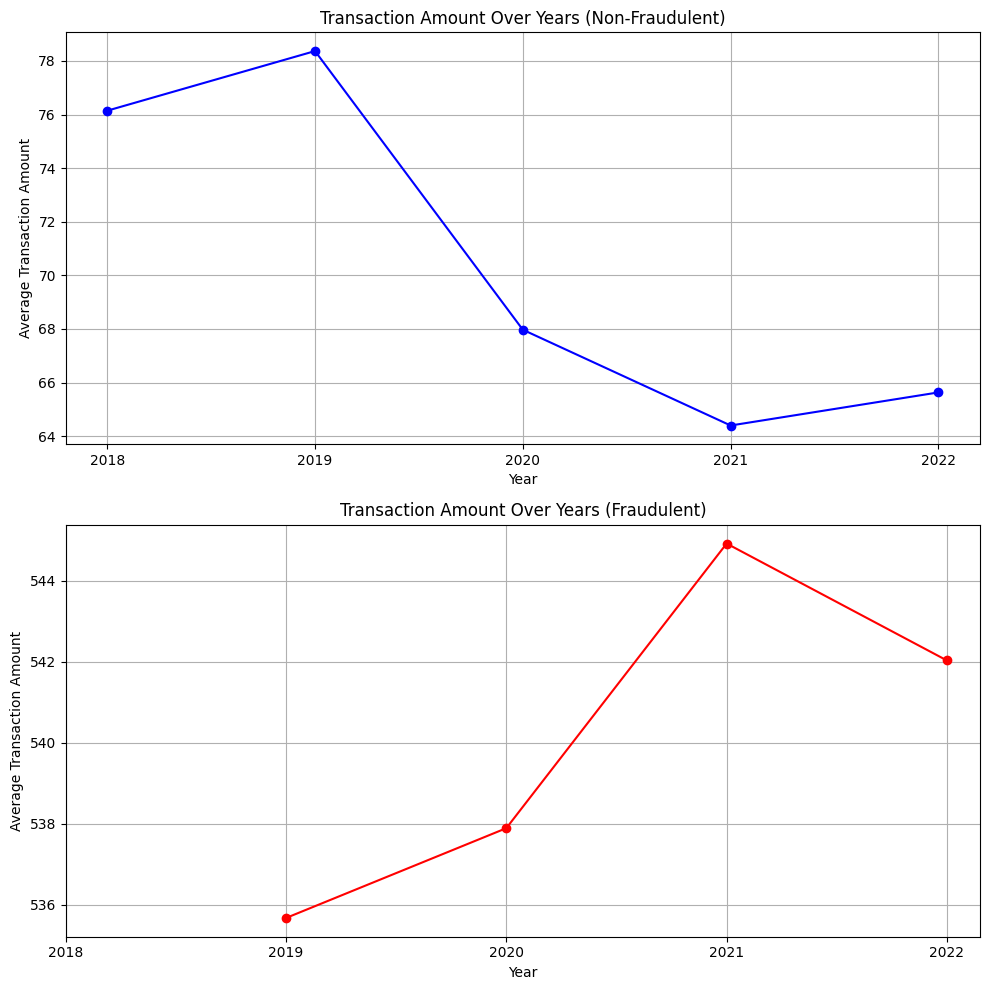

In [48]:
# Group by year and calculate sum of transaction amounts for both fraudulent and non-fraudulent transactions
yearly_transactions = merged_df.groupby(['year', 'is_fraud'])['amt'].mean().unstack()

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot transaction amount over years for non-fraudulent transactions
axes[0].plot(yearly_transactions.index, yearly_transactions[0], marker='o', color='blue')
axes[0].set_title('Transaction Amount Over Years (Non-Fraudulent)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Transaction Amount')
axes[0].grid(True)
axes[0].set_xticks(yearly_transactions.index)  # Ensure each year is labeled on the x-axis

# Plot transaction amount over years for fraudulent transactions
axes[1].plot(yearly_transactions.index, yearly_transactions[1], marker='o', color='red')
axes[1].set_title('Transaction Amount Over Years (Fraudulent)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Transaction Amount')
axes[1].grid(True)
axes[1].set_xticks(yearly_transactions.index)  # Ensure each year is labeled on the x-axis

plt.tight_layout()
plt.show()

In [49]:

merged_df['amt_transformed'] = np.log10(merged_df['amt'] + 0.001)

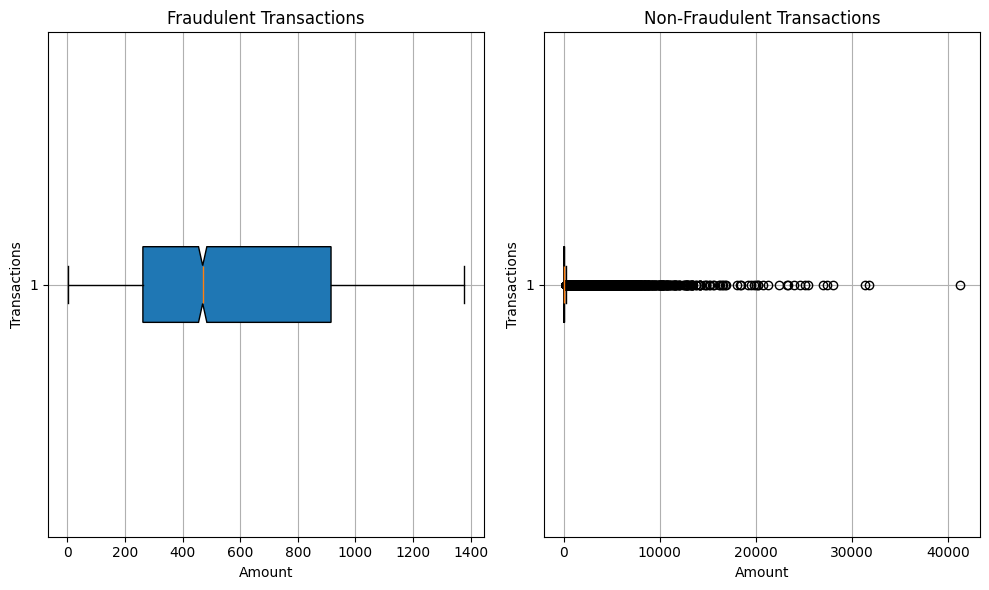

In [51]:
# Prepare fraudulent and non-fraudulent data
fraudulent_data = merged_df[merged_df['is_fraud'] == 1]['amt']
non_fraudulent_data = merged_df[merged_df['is_fraud'] == 0]['amt']

# Create box plots
plt.figure(figsize=(10, 6))

# Fraudulent transactions box plot
plt.subplot(1, 2, 1)
plt.boxplot(fraudulent_data, patch_artist=True, notch=True, vert=False)
plt.title('Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Transactions')
plt.grid(True)

# Non-fraudulent transactions box plot
plt.subplot(1, 2, 2)
plt.boxplot(non_fraudulent_data, patch_artist=True, notch=True, vert=False)
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Transactions')
plt.grid(True)

plt.tight_layout()
plt.show()


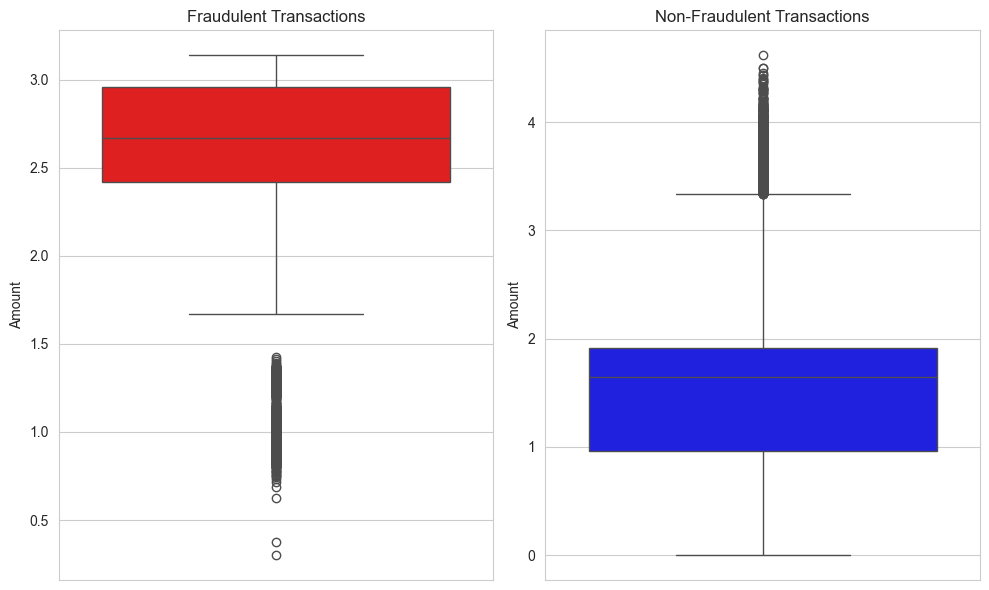

In [56]:
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Create box plots
plt.figure(figsize=(10, 6))

# Fraudulent transactions box plot
plt.subplot(1, 2, 1)
sns.boxplot(y='amt_transformed', data=merged_df[merged_df['is_fraud'] == 1], color='red')
plt.title('Fraudulent Transactions')
plt.ylabel('Amount')

# Non-fraudulent transactions box plot
plt.subplot(1, 2, 2)
sns.boxplot(y='amt_transformed', data=merged_df[merged_df['is_fraud'] == 0], color='blue')
plt.title('Non-Fraudulent Transactions')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


In [58]:
merged_df['amt_transformed'].describe()

count    4.260904e+06
mean     1.479963e+00
std      6.111727e-01
min      4.340775e-04
25%      9.590891e-01
50%      1.648272e+00
75%      1.911589e+00
max      4.615956e+00
Name: amt_transformed, dtype: float64

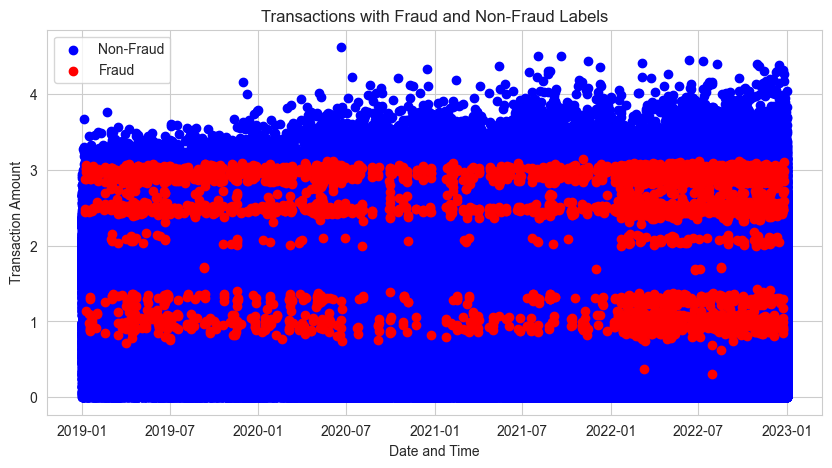

In [62]:
# Plot the fraud and non-fraud transactions with labels
plt.figure(figsize=(10, 5))

# Plot non-fraud transactions
non_fraud = merged_df[merged_df['is_fraud'] == 0]
plt.scatter(non_fraud['datetime'], non_fraud['amt_transformed'], color='blue', label='Non-Fraud')

# Plot fraud transactions
fraud = merged_df[merged_df['is_fraud'] == 1]
plt.scatter(fraud['datetime'], fraud['amt_transformed'], color='red', label='Fraud')

# Customize the plot
plt.title('Transactions with Fraud and Non-Fraud Labels')
plt.xlabel('Date and Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)++
plt.show()

In [65]:
bins_train = np.math.floor(len(merged_df)**(1/3))


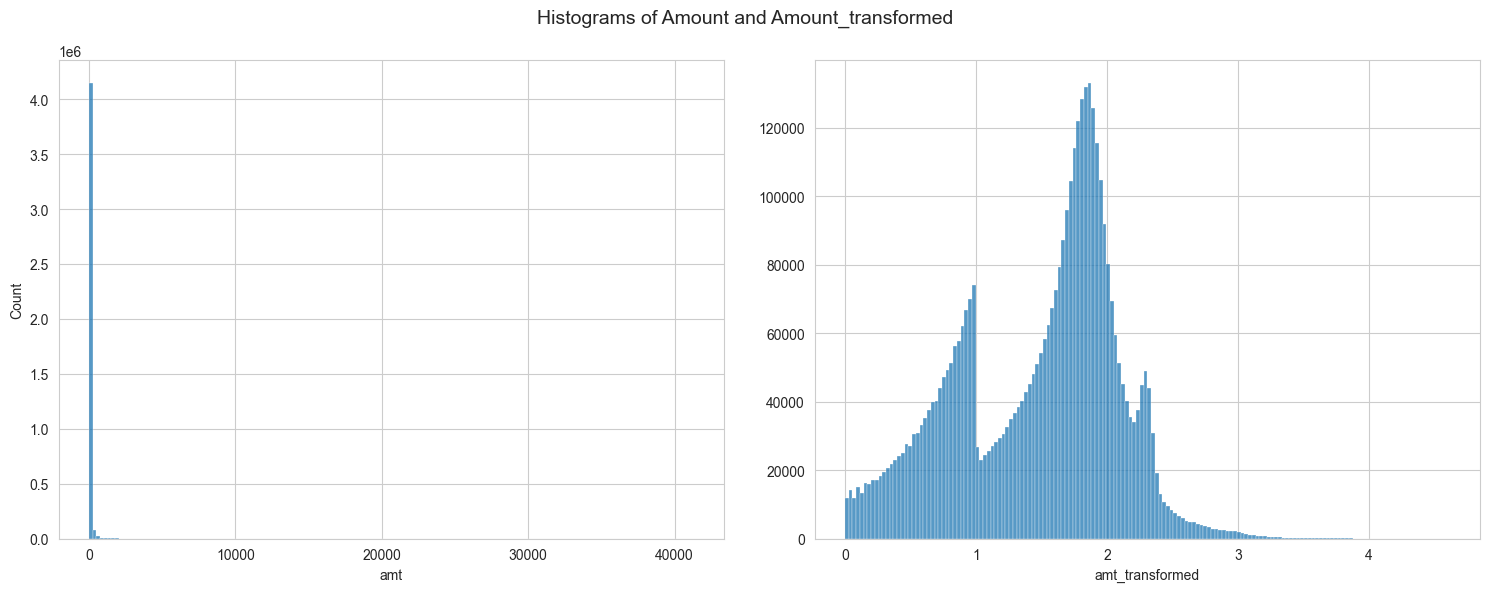

In [67]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = merged_df, x = 'amt', bins = bins_train, ax = ax[0])
sns.histplot(data = merged_df, x = 'amt_transformed', bins = bins_train, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Amount and Amount_transformed", size = 14)
plt.tight_layout()
plt.show()

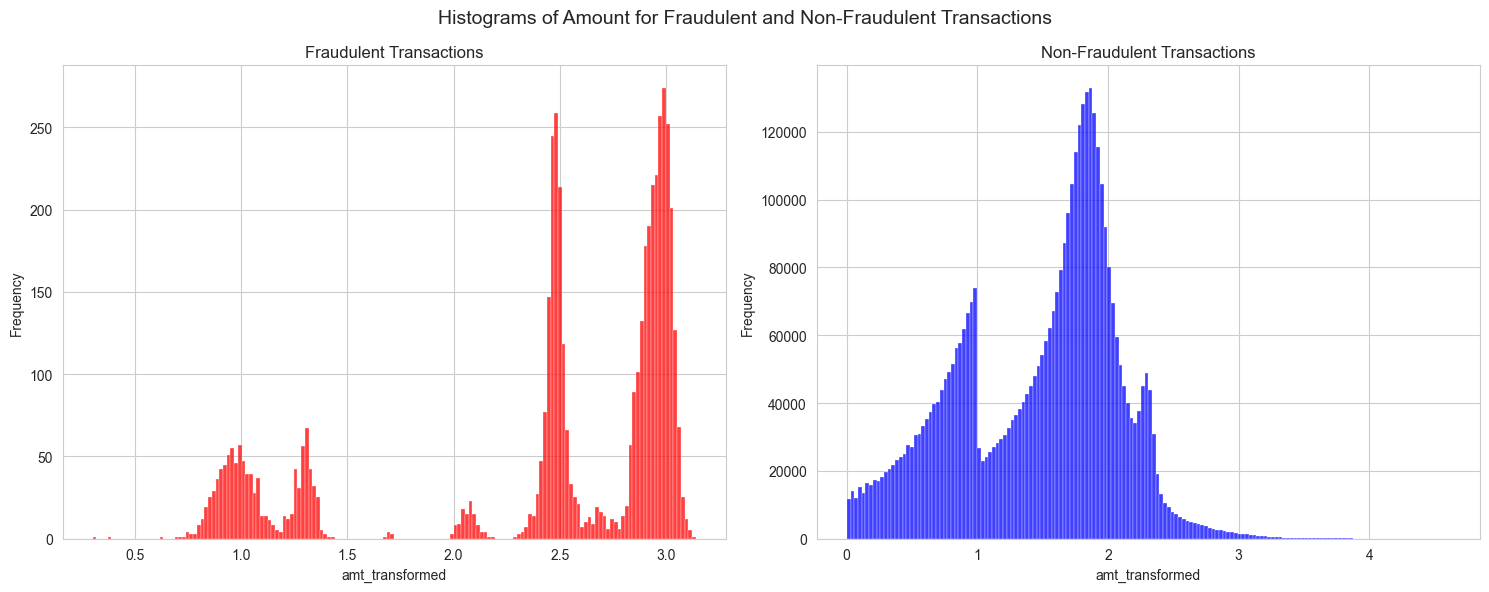

In [71]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Histogram for fraudulent transactions
sns.histplot(data=merged_df[merged_df['is_fraud'] == 1], x='amt_transformed', bins=bins_train, ax=ax[0], color='red')
ax[0].set_title('Fraudulent Transactions')
ax[0].set_ylabel('Frequency')

# Histogram for non-fraudulent transactions
sns.histplot(data=merged_df[merged_df['is_fraud'] == 0], x='amt_transformed', bins=bins_train, ax=ax[1], color='blue')
ax[1].set_title('Non-Fraudulent Transactions')
ax[1].set_ylabel('Frequency')

plt.suptitle("Histograms of Amount for Fraudulent and Non-Fraudulent Transactions", size=14)
plt.tight_layout()
plt.show()


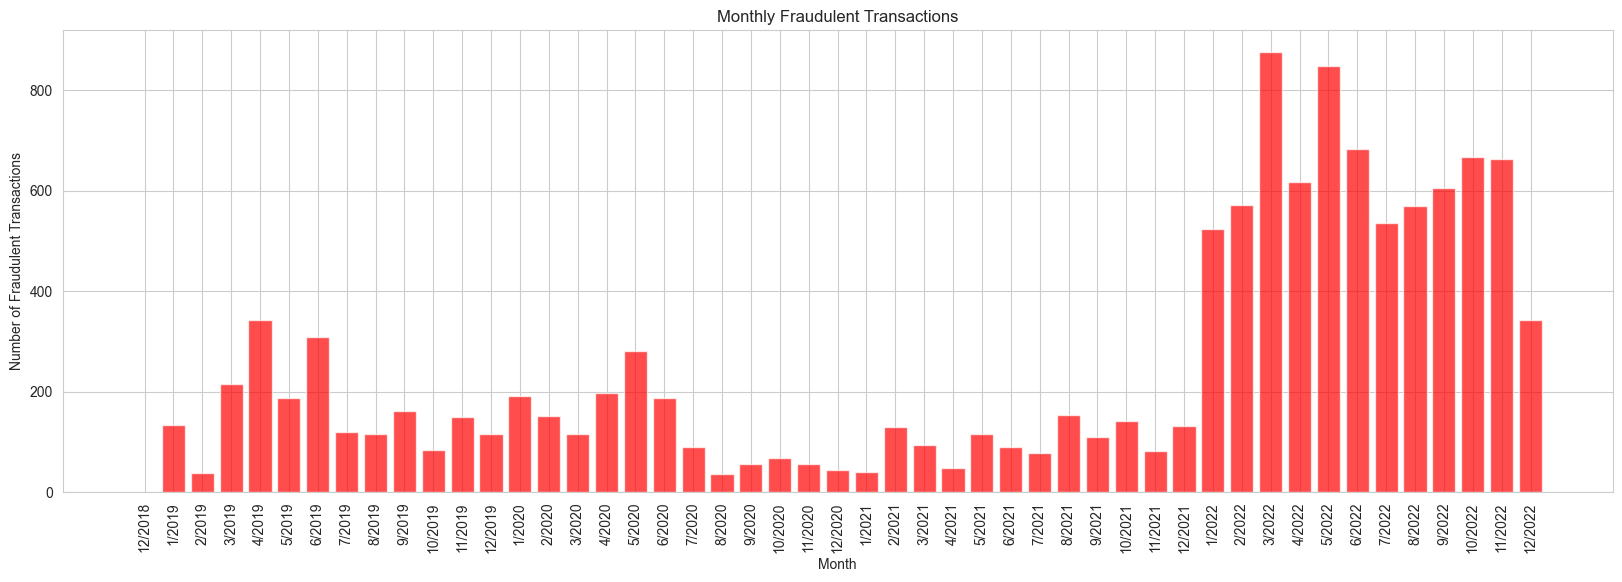

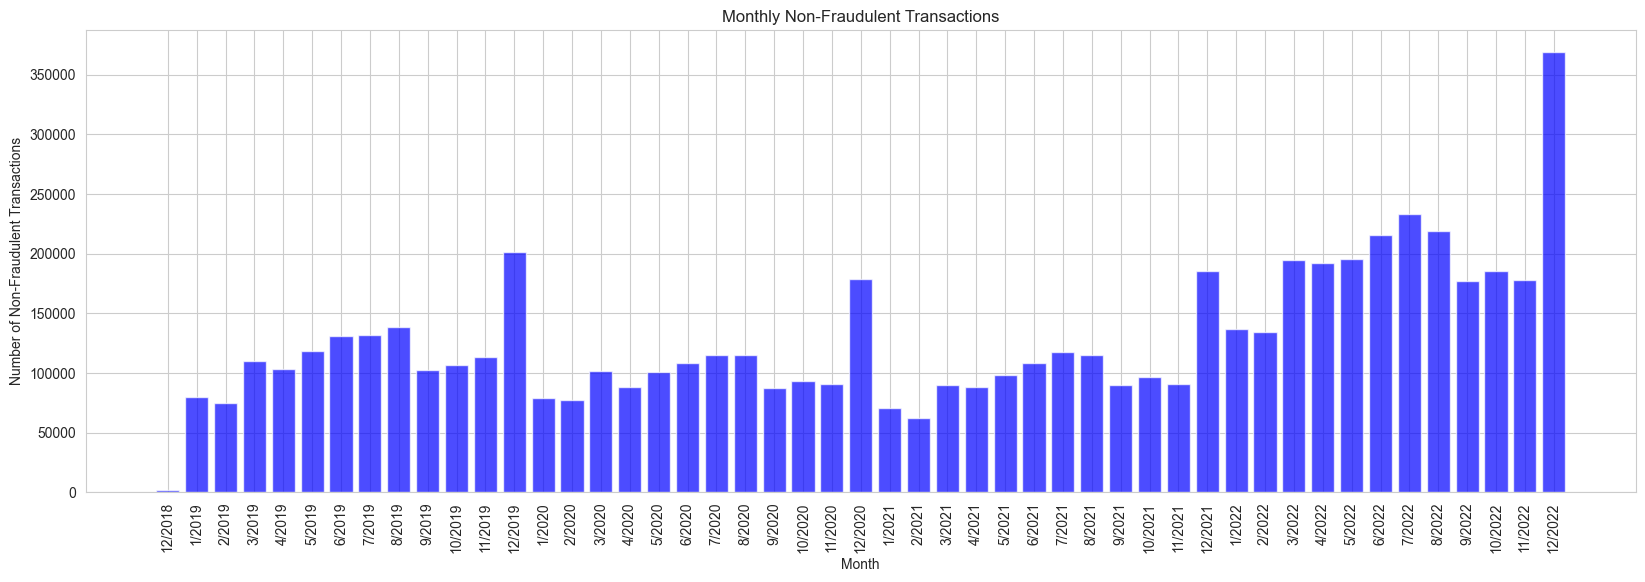

In [89]:
# Group by year and month and aggregate the fraud data
monthly_fraud = merged_df.groupby(['year', 'month', 'is_fraud'])['amt_transformed'].sum().unstack(fill_value=0)

# Convert index to strings for compatibility
monthly_fraud.index = [f"{month[1]}/{month[0]}" for month in monthly_fraud.index]

# Plot fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[1], color='red', alpha=0.7)
plt.title('Monthly Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

# Plot non-fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[0], color='blue', alpha=0.7)
plt.title('Monthly Non-Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

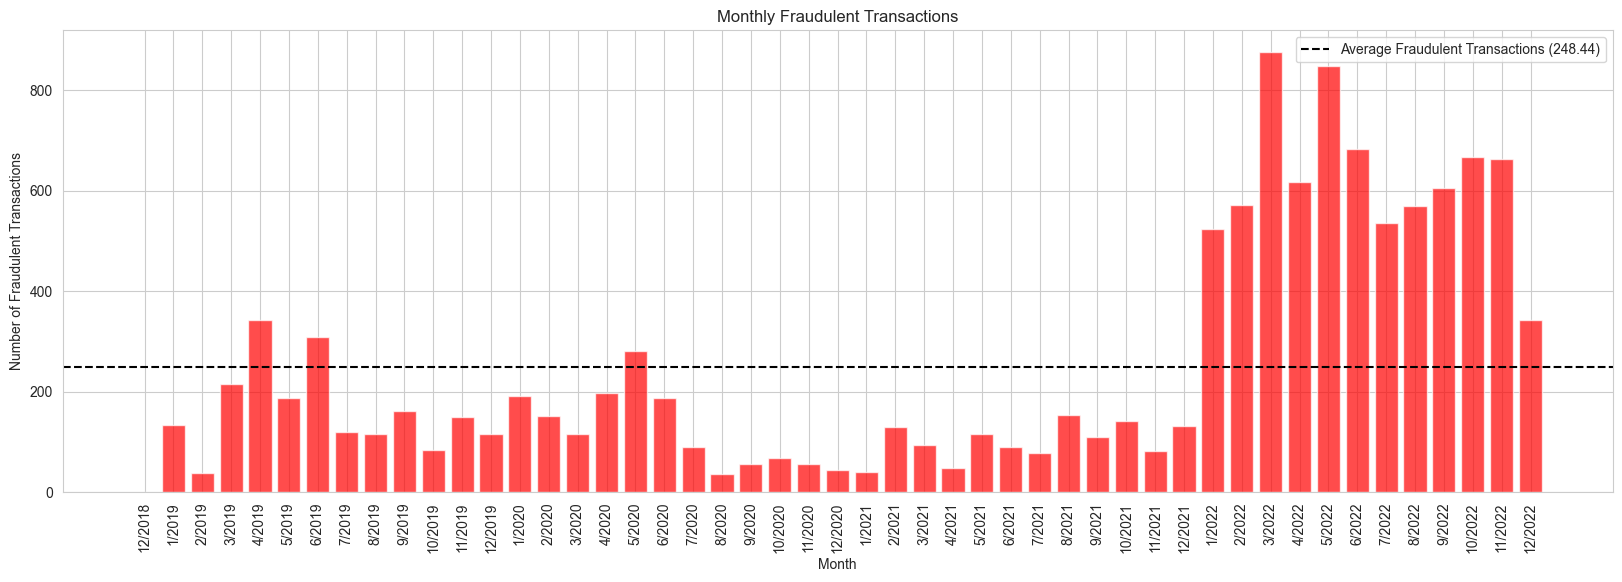

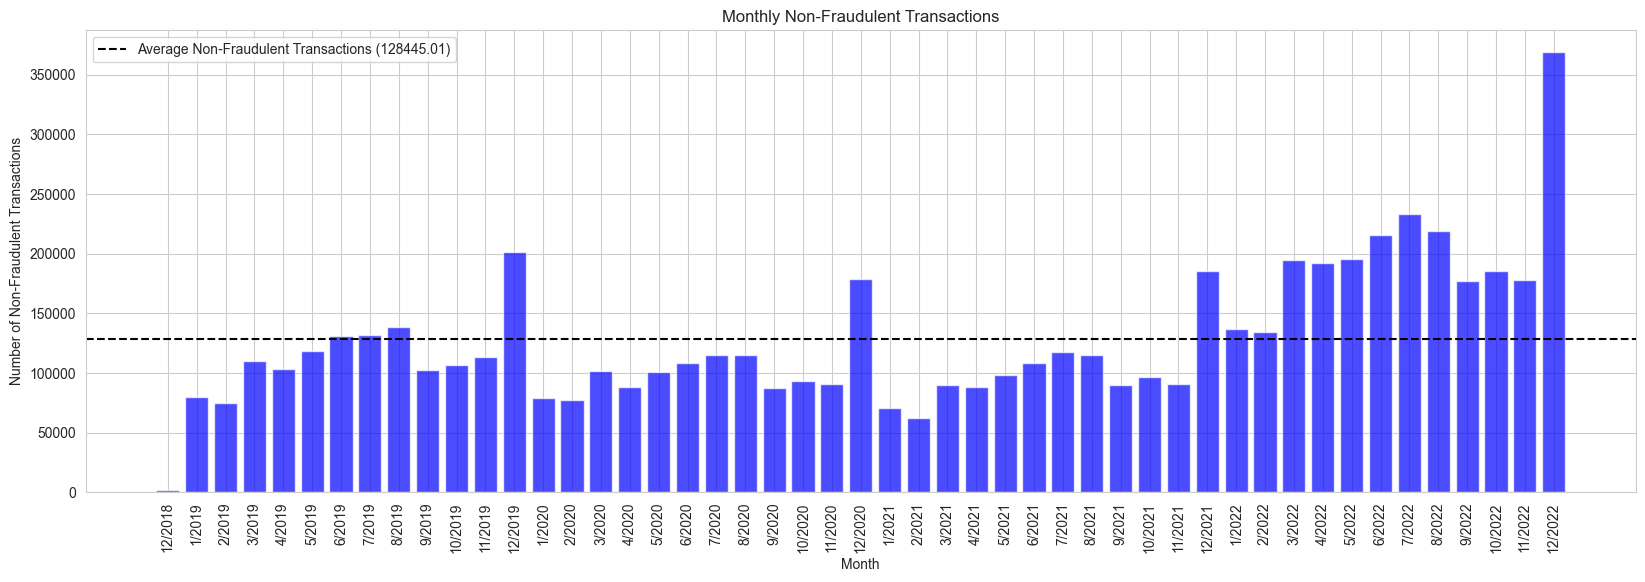

In [91]:
# Calculate average fraudulent transactions
avg_fraud = monthly_fraud[1].mean()

# Calculate average non-fraudulent transactions
avg_non_fraud = monthly_fraud[0].mean()

# Plot fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[1], color='red', alpha=0.7)
plt.axhline(y=avg_fraud, color='black', linestyle='--', label=f'Average Fraudulent Transactions ({avg_fraud:.2f})')
plt.title('Monthly Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot non-fraudulent transactions
plt.figure(figsize=(20, 6))
plt.bar(monthly_fraud.index, monthly_fraud[0], color='blue', alpha=0.7)
plt.axhline(y=avg_non_fraud, color='black', linestyle='--', label=f'Average Non-Fraudulent Transactions ({avg_non_fraud:.2f})')
plt.title('Monthly Non-Fraudulent Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [93]:
# Calculate average fraudulent transactions
avg_fraud = fraud['amt_transformed'].mean()

# Calculate average non-fraudulent transactions
avg_non_fraud = non_fraud['amt_transformed'].mean()

# Plot the fraud and non-fraud transactions with labels
plt.figure(figsize=(10, 5))

# Plot non-fraud transactions
plt.scatter(non_fraud['datetime'], non_fraud['amt_transformed'], color='blue', label='Non-Fraud')

# Plot fraud transactions
plt.scatter(fraud['datetime'], fraud['amt_transformed'], color='red', label='Fraud')

# Add average horizontal lines
plt.axhline(y=avg_non_fraud, color='blue', linestyle='--', label=f'Average Non-Fraudulent Amount ({avg_non_fraud:.2f})')
plt.axhline(y=avg_fraud, color='red', linestyle='--', label=f'Average Fraudulent Amount ({avg_fraud:.2f})')

# Customize the plot
plt.title('Transactions with Fraud and Non-Fraud Labels')
plt.xlabel('Date and Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()



KeyboardInterrupt



In [94]:
merged_df['is_fraud'].value_counts()

is_fraud
0    4255870
1       5034
Name: count, dtype: int64

In [103]:
merged_df.groupby(['year', 'is_fraud'])['is_fraud'].count()

year  is_fraud
2018  0              1080
2019  0            859423
      1               824
2020  0            856771
      1               610
2021  0            859269
      1               504
2022  0           1679327
      1              3096
Name: is_fraud, dtype: int64

In [110]:
1679327/3096

542.4182816537468

In [111]:
859269/504

1704.8988095238096

In [112]:
856771/610

1404.5426229508196

In [113]:
859423/824


1042.9890776699028

In [114]:
df = merged_df.copy()

In [116]:
resampled_df = df[(df['year'] == 2019)]


In [118]:
resampled_df

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,...,job,dob,datetime,year,month,day,hour,minute,second,amt_transformed
3250082,2302105,4956252571509976837,150581222763,502bee100988f3ad3b26436d320efea1,1546300811,gas_transport,74.60,0,Morales Inc,35.813675,...,Cartographer,1984-03-30,2019-01-01 00:00:11,2019,1,1,0,0,11,1.872745
108802,93003,3515727919409615,594076940942,415673c00158c5a991f41fc21140670b,1546300822,gas_transport,3.55,0,Lewis-Herrera,36.154814,...,Architectural technologist,1956-03-21,2019-01-01 00:00:22,2019,1,1,0,0,22,0.550351
3002999,2932579,4804661963990766,76078041630,0c2c0010396e9a2c3ea037a3e43587cf,1546300832,gas_transport,41.21,0,Lam-Smith,29.053567,...,"Therapist, nutritional",1973-04-21,2019-01-01 00:00:32,2019,1,1,0,0,32,1.615013
3823956,2814945,4361337605230458,349734538563,eceb50b8ba030a5fe757af9be2e9f056,1546300852,gas_transport,42.07,0,Smith-Moore,41.192812,...,Chief Strategy Officer,1984-06-12,2019-01-01 00:00:52,2019,1,1,0,0,52,1.623983
1383654,926698,4726282968244854,303359320618,69000df415ef63fe815cc38ae0e574e8,1546300872,gas_transport,4.11,0,Smith Inc,28.926321,...,"Psychologist, sport and exercise",1984-05-28,2019-01-01 00:01:12,2019,1,1,0,1,12,0.613947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139714,3451729,3508835615951480,917181406434,915be38f8bb2c759848452d96e1114b0,1577836662,misc_pos,21.57,0,Thomas Ltd,32.146188,...,"Optician, dispensing",1986-08-14,2019-12-31 23:57:42,2019,12,31,23,57,42,1.333870
3512675,4104651,343926142939687,662887798281,a0a63d8378e1c3811cefcb8ac0f5e272,1577836730,grocery_pos,25.51,0,Mcdonald Inc,34.946374,...,Call centre manager,1980-03-05,2019-12-31 23:58:50,2019,12,31,23,58,50,1.406727
3730952,2740566,3550105875256807,112320137593,e98a401f70460b42e146871eacca15af,1577836750,grocery_pos,17.24,0,Jones Group,41.422255,...,Counselling psychologist,1980-08-20,2019-12-31 23:59:10,2019,12,31,23,59,10,1.236562
1961076,1426120,180026395612663,822391006454,26d246a51d0e96bac75d21ed726be7f0,1577836755,misc_pos,86.90,0,Murillo LLC,32.534324,...,"Scientist, water quality",1987-12-16,2019-12-31 23:59:15,2019,12,31,23,59,15,1.939025


In [148]:
# and 'cc_num' is the column name for the credit card number

# Sort the DataFrame by credit card number and timestamp
resampled_df_sorted = resampled_df.sort_values(by=['cc_num', 'datetime'])

# Group the sorted DataFrame by credit card number
grouped = resampled_df_sorted.groupby('cc_num')

# Calculate the duration of transactions for each credit card number
transaction_duration = grouped['datetime'].diff().dt.total_seconds()

# Add the transaction duration as a new feature 'transaction_duration' to the original DataFrame
resampled_df['transaction_duration'] = transaction_duration

# Print the DataFrame with the transaction duration added as a feature
print(resampled_df)

         Unnamed: 0               cc_num      acct_num  \
3250082     2302105  4956252571509976837  150581222763   
108802        93003     3515727919409615  594076940942   
3002999     2932579     4804661963990766   76078041630   
3823956     2814945     4361337605230458  349734538563   
1383654      926698     4726282968244854  303359320618   
...             ...                  ...           ...   
139714      3451729     3508835615951480  917181406434   
3512675     4104651      343926142939687  662887798281   
3730952     2740566     3550105875256807  112320137593   
1961076     1426120      180026395612663  822391006454   
2247325     1599518     4841962332605860    3005591724   

                                trans_num   unix_time       category     amt  \
3250082  502bee100988f3ad3b26436d320efea1  1546300811  gas_transport   74.60   
108802   415673c00158c5a991f41fc21140670b  1546300822  gas_transport    3.55   
3002999  0c2c0010396e9a2c3ea037a3e43587cf  1546300832  gas_tran

In [122]:
import pandas as pd

# Assuming 'timestamp' is the column name for the transaction timestamp
# and 'cc_num' is the column name for the credit card number

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 1]

# Sort the fraud DataFrame by credit card number and timestamp
fraudulent_df_sorted = fraudulent_df.sort_values(by=['cc_num', 'datetime'])

# Group the sorted fraud DataFrame by credit card number
grouped = fraudulent_df_sorted.groupby('cc_num')

# Calculate the duration between consecutive transactions for each credit card number
transaction_duration = grouped['datetime'].diff()

# Add the transaction duration as a new column 'transaction_duration' to the fraud DataFrame
fraudulent_df['transaction_duration'] = transaction_duration

# Filter out the first transaction for each credit card number (as it doesn't have a previous transaction)
consecutive_transactions = fraudulent_df.dropna(subset=['transaction_duration'])

# Print the DataFrame with the consecutive records of time duration between two transactions in fraud data
print(consecutive_transactions)


         Unnamed: 0            cc_num      acct_num  \
697233       264781     4348110501474  817422262939   
697232       264780     4348110501474  817422262939   
697231       264779     4348110501474  817422262939   
697235       264783     4348110501474  817422262939   
697236       264784     4348110501474  817422262939   
...             ...               ...           ...   
3342878     2373418  4055934296711142  989331266010   
1442665     1244045  3531261685071052  897566796191   
1442663     1244043  3531261685071052  897566796191   
1442667     1244047  3531261685071052  897566796191   
1442666     1244046  3531261685071052  897566796191   

                                trans_num   unix_time       category      amt  \
697233   a2be1cd817216718314807458a9ce2ea  1546785827    grocery_pos   279.29   
697232   c2878d6f17ccf83c0d27823e5d44e71f  1546820691    grocery_pos   300.47   
697231   95199faf550c8ae9e2bc5d070232842a  1546868582       misc_net    13.88   
697235   4712ac

In [132]:
import matplotlib.pyplot as plt

# Plot a histogram of transaction durations
plt.figure(figsize=(10, 6))
plt.hist(consecutive_transactions['transaction_duration'].dt.total_seconds(), bins=bin_train, color='red', alpha=0.7)
plt.title('Distribution of Transaction Durations (Fraudulent Transactions)')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


NameError: name 'bin_train' is not defined

<Figure size 1000x600 with 0 Axes>

In [124]:
import pandas as pd

# Assuming 'timestamp' is the column name for the transaction timestamp
# and 'cc_num' is the column name for the credit card number

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 0]

# Sort the fraud DataFrame by credit card number and timestamp
fraudulent_df_sorted = fraudulent_df.sort_values(by=['cc_num', 'datetime'])

# Group the sorted fraud DataFrame by credit card number
grouped = fraudulent_df_sorted.groupby('cc_num')

# Calculate the duration between consecutive transactions for each credit card number
transaction_duration = grouped['datetime'].diff()

# Add the transaction duration as a new column 'transaction_duration' to the fraud DataFrame
fraudulent_df['transaction_duration'] = transaction_duration

# Filter out the first transaction for each credit card number (as it doesn't have a previous transaction)
consecutive_transactions = fraudulent_df.dropna(subset=['transaction_duration'])

# Print the DataFrame with the consecutive records of time duration between two transactions in fraud data
print(consecutive_transactions)


         Unnamed: 0            cc_num      acct_num  \
1894217     1373223  2687017999324205  856538458652   
84042         72181     4571983863842  664596582306   
3939679     3306166  3523285558095799  702777208646   
3484993     4082343  4165820297021358  580411980930   
459292       502063  5145203608941188  411927317910   
...             ...               ...           ...   
1423499      960802  6570703850360591  182563338256   
2017224     1471897  4414925316498286  395217487731   
2869121     2038961  4946209355610391  232488012574   
1666563     1232935   340534240891645  160497086732   
2655597     1978386   349825309251148    4322238535   

                                trans_num   unix_time       category     amt  \
1894217  49926edf9f495f7ff1864fe4c81b1bb7  1546262544  gas_transport  115.12   
84042    f1112568cd123ea9c964560c0f8c2048  1546262627  gas_transport   92.45   
3939679  3d3d9d771691632707fd08f6d0b093a4  1546264030  gas_transport   68.76   
3484993  465f14a191

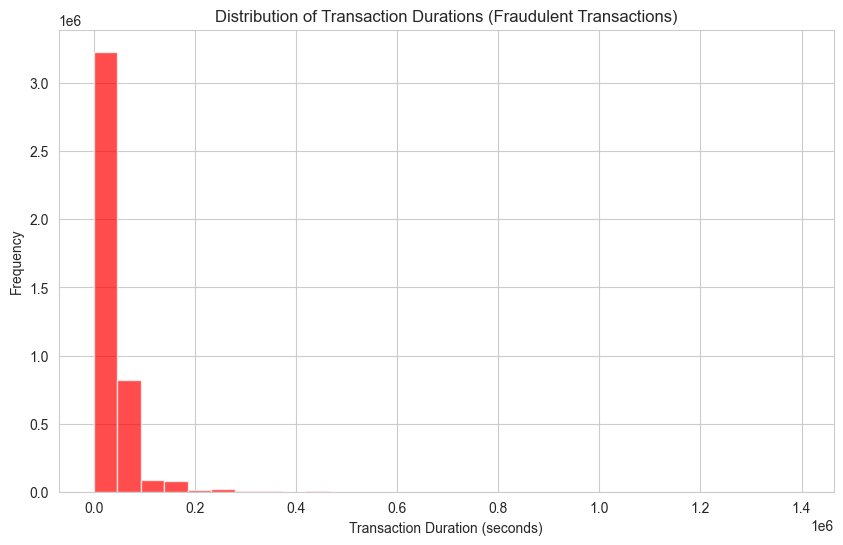

In [125]:
import matplotlib.pyplot as plt

# Plot a histogram of transaction durations
plt.figure(figsize=(10, 6))
plt.hist(consecutive_transactions['transaction_duration'].dt.total_seconds(), bins=30, color='red', alpha=0.7)
plt.title('Distribution of Transaction Durations (Fraudulent Transactions)')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

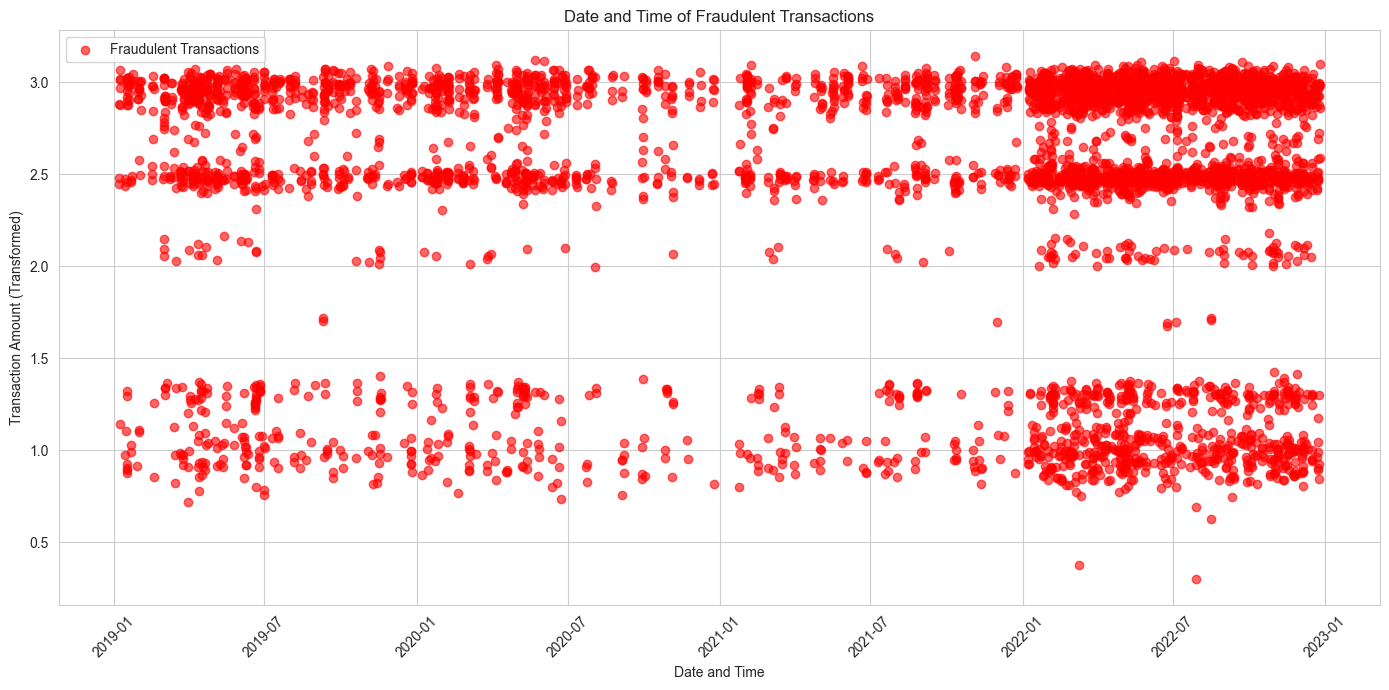

In [127]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 1]

# Plot the date and time of fraudulent transactions
plt.figure(figsize=(14, 7))
plt.scatter(fraudulent_df['datetime'], fraudulent_df['amt_transformed'], color='red', alpha=0.6, label='Fraudulent Transactions')
plt.title('Date and Time of Fraudulent Transactions')
plt.xlabel('Date and Time')
plt.ylabel('Transaction Amount (Transformed)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


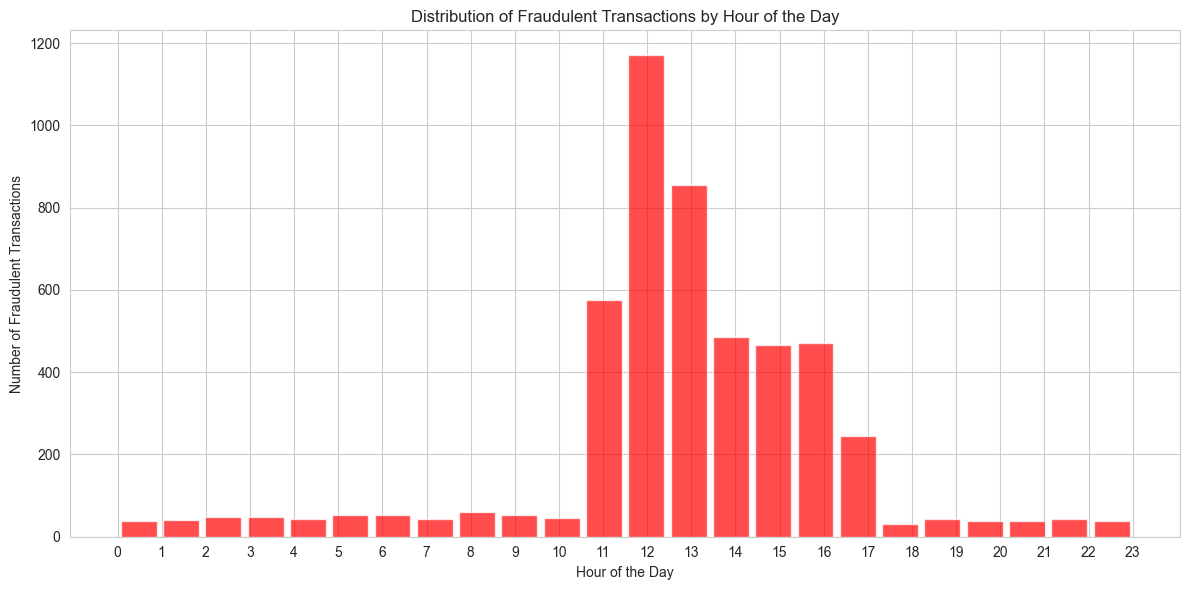

In [128]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 1]

# Extract the hour from the timestamp
# fraudulent_df['hour'] = fraudulent_df['timestamp'].dt.hour

# Plot the distribution of fraudulent transactions by hour
plt.figure(figsize=(12, 6))
plt.hist(fraudulent_df['hour'], bins=24, color='red', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


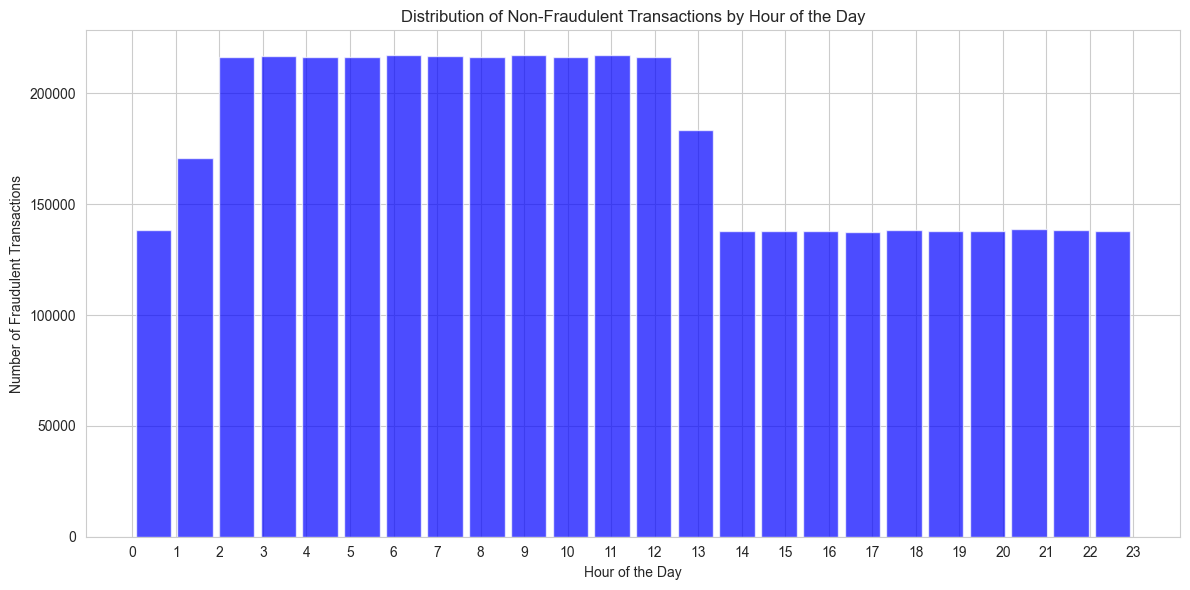

In [239]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 0]

# Extract the hour from the timestamp
# fraudulent_df['hour'] = fraudulent_df['timestamp'].dt.hour

# Plot the distribution of fraudulent transactions by hour
plt.figure(figsize=(12, 6))
plt.hist(fraudulent_df['hour'], bins=24, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Distribution of Non-Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [247]:
consecutive_transactions["is_fraud"].value_counts()

is_fraud
0    4254898
Name: count, dtype: int64

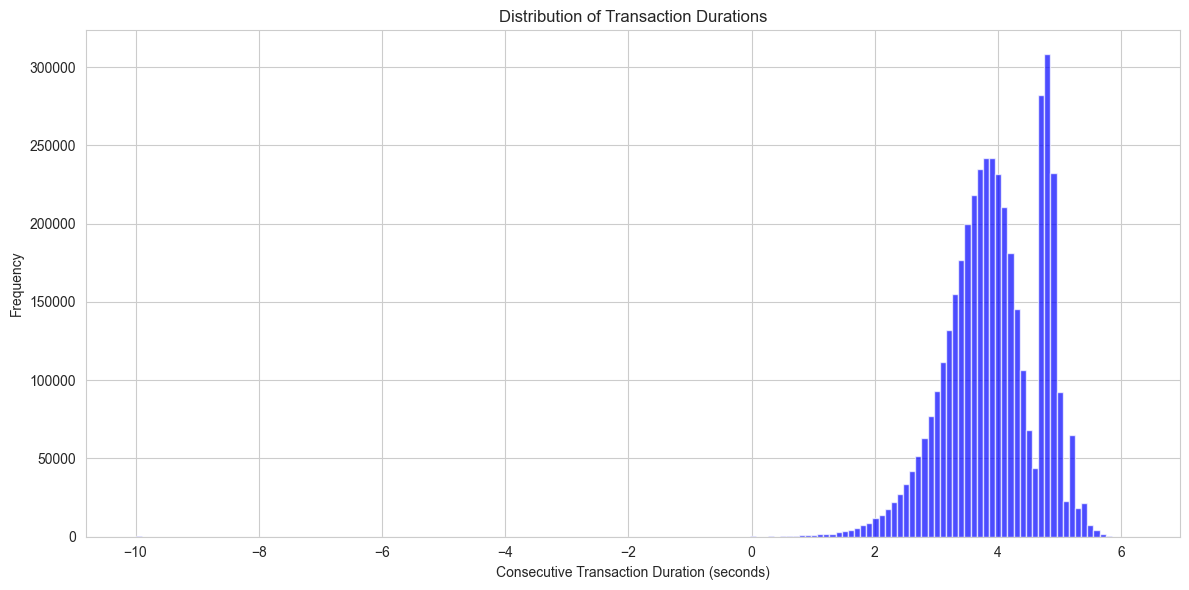

In [242]:
plt.figure(figsize=(12, 6))
plt.hist(np.log10(consecutive_transactions['transaction_duration'].dt.total_seconds()+0.0000000001), bins=bins_train, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Durations')
plt.xlabel('Consecutive Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
import pandas as pd

# Assuming 'timestamp' is the column name for the transaction timestamp
# and 'cc_num' is the column name for the credit card number

# Filter the DataFrame to include only fraudulent transactions
fraudulent_df = merged_df[merged_df['is_fraud'] == 1]

# Convert 'timestamp' to datetime if it is not already
# fraudulent_df['datetime'] = pd.to_datetime(fraudulent_df['datet'])

# # Create 'date' and 'hour' columns
fraudulent_df['date'] = fraudulent_df['datetime'].dt.date
# fraudulent_df['hour'] = fraudulent_df['timestamp'].dt.hour

# Group by 'cc_num', 'date', and 'hour' and count the number of transactions
grouped_fraud_transactions = fraudulent_df.groupby(['cc_num', 'date', 'hour']).size().reset_index(name='transaction_count')

# Print the grouped transactions
print(grouped_fraud_transactions)


                   cc_num        date  hour  transaction_count
0             60400268763  2022-10-08    17                  1
1             60400268763  2022-10-09    11                  1
2             60400268763  2022-10-09    12                  3
3             60400268763  2022-10-10     1                  1
4             60400268763  2022-10-10    12                  1
...                   ...         ...   ...                ...
3234  4968827697040953141  2020-05-11    12                  1
3235  4968827697040953141  2020-05-11    13                  1
3236  4968827697040953141  2020-05-12     9                  1
3237  4968827697040953141  2020-05-12    12                  1
3238  4968827697040953141  2020-05-12    13                  1

[3239 rows x 4 columns]


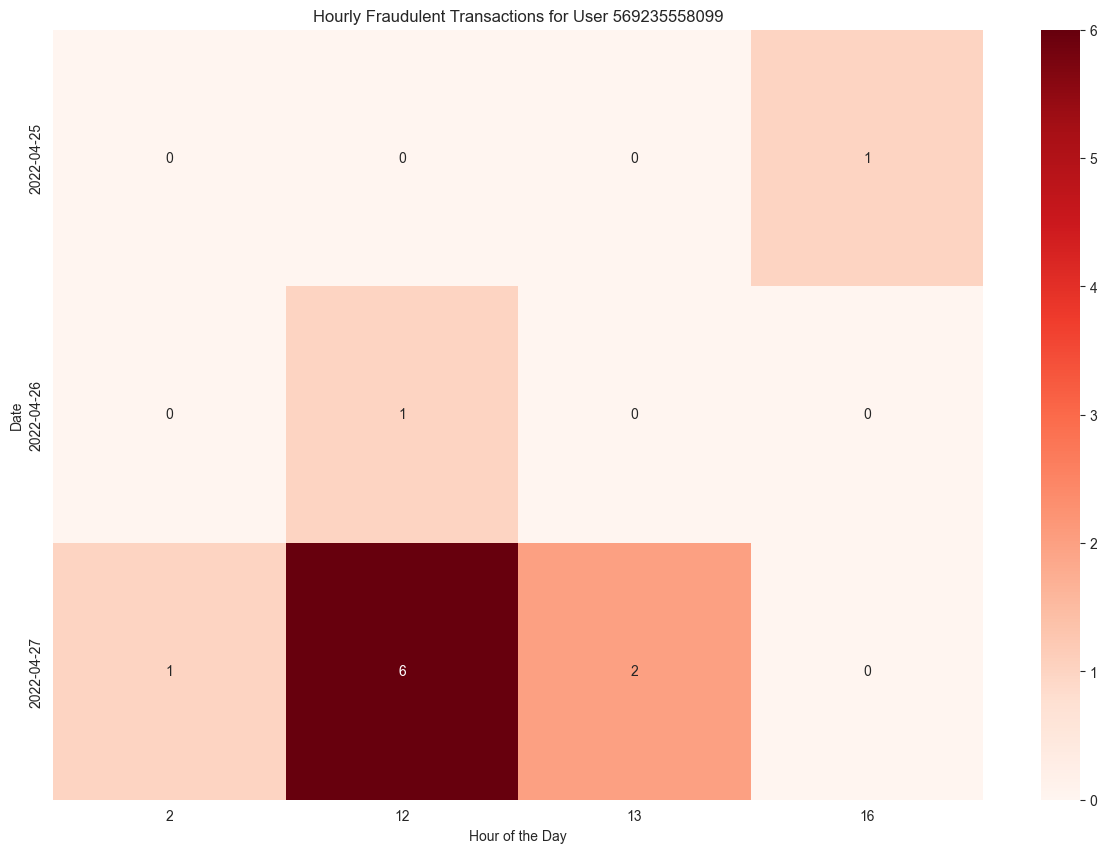

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a specific user to visualize
cc_num_to_plot = grouped_fraud_transactions['cc_num'].unique()[20]  # For example, use the first user

# Filter data for the selected user
user_fraud_data = grouped_fraud_transactions[grouped_fraud_transactions['cc_num'] == cc_num_to_plot]

# Pivot the data for heatmap (date as rows, hour as columns)
pivot_fraud_data = user_fraud_data.pivot(index='date', columns='hour', values='transaction_count').fillna(0)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_fraud_data, cmap='Reds', annot=True, fmt='g')
plt.title(f'Hourly Fraudulent Transactions for User {cc_num_to_plot}')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


In [147]:
resampled_df

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,...,dob,datetime,year,month,day,hour,minute,second,amt_transformed,transaction_duration
3250082,2302105,4956252571509976837,150581222763,502bee100988f3ad3b26436d320efea1,1546300811,gas_transport,74.60,0,Morales Inc,35.813675,...,1984-03-30,2019-01-01 00:00:11,2019,1,1,0,0,11,1.872745,NaN
108802,93003,3515727919409615,594076940942,415673c00158c5a991f41fc21140670b,1546300822,gas_transport,3.55,0,Lewis-Herrera,36.154814,...,1956-03-21,2019-01-01 00:00:22,2019,1,1,0,0,22,0.550351,NaN
3002999,2932579,4804661963990766,76078041630,0c2c0010396e9a2c3ea037a3e43587cf,1546300832,gas_transport,41.21,0,Lam-Smith,29.053567,...,1973-04-21,2019-01-01 00:00:32,2019,1,1,0,0,32,1.615013,NaN
3823956,2814945,4361337605230458,349734538563,eceb50b8ba030a5fe757af9be2e9f056,1546300852,gas_transport,42.07,0,Smith-Moore,41.192812,...,1984-06-12,2019-01-01 00:00:52,2019,1,1,0,0,52,1.623983,NaN
1383654,926698,4726282968244854,303359320618,69000df415ef63fe815cc38ae0e574e8,1546300872,gas_transport,4.11,0,Smith Inc,28.926321,...,1984-05-28,2019-01-01 00:01:12,2019,1,1,0,1,12,0.613947,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139714,3451729,3508835615951480,917181406434,915be38f8bb2c759848452d96e1114b0,1577836662,misc_pos,21.57,0,Thomas Ltd,32.146188,...,1986-08-14,2019-12-31 23:57:42,2019,12,31,23,57,42,1.333870,84355.0
3512675,4104651,343926142939687,662887798281,a0a63d8378e1c3811cefcb8ac0f5e272,1577836730,grocery_pos,25.51,0,Mcdonald Inc,34.946374,...,1980-03-05,2019-12-31 23:58:50,2019,12,31,23,58,50,1.406727,2186.0
3730952,2740566,3550105875256807,112320137593,e98a401f70460b42e146871eacca15af,1577836750,grocery_pos,17.24,0,Jones Group,41.422255,...,1980-08-20,2019-12-31 23:59:10,2019,12,31,23,59,10,1.236562,231.0
1961076,1426120,180026395612663,822391006454,26d246a51d0e96bac75d21ed726be7f0,1577836755,misc_pos,86.90,0,Murillo LLC,32.534324,...,1987-12-16,2019-12-31 23:59:15,2019,12,31,23,59,15,1.939025,37588.0


In [152]:
resampled_df.isna().sum()

Unnamed: 0                0
cc_num                    0
acct_num                  0
trans_num                 0
unix_time                 0
category                  0
amt                       0
is_fraud                  0
merchant                  0
merch_lat                 0
merch_long                0
ssn                       0
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
dob                       0
datetime                  0
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
amt_transformed           0
transaction_duration    888
dtype: int64

In [157]:
resampled_df.columns

Index(['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
       'category', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
       'ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'amt_transformed',
       'transaction_duration'],
      dtype='object')

In [158]:
 features_to_be_dropped = ['Unnamed: 0', 'cc_num', 'acct_num', 'trans_num', 'unix_time',
'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long',
'ssn', 'first', 'last',  'street', 'city', 'state', 'zip',
'lat', 'long', 'city_pop', 'job', 'dob', 'datetime', 'year', 'transaction_duration']

In [160]:
considered_df = resampled_df.drop(columns=features_to_be_dropped)

In [163]:
considered_df = pd.get_dummies(considered_df, columns=['category', 'gender'])

In [165]:
considered_df

,month,day,hour,minute,second,amt_transformed,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
3250082,1,1,0,0,11,1.872745,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
108802,1,1,0,0,22,0.550351,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3002999,1,1,0,0,32,1.615013,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3823956,1,1,0,0,52,1.623983,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1383654,1,1,0,1,12,0.613947,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139714,12,31,23,57,42,1.333870,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3512675,12,31,23,58,50,1.406727,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3730952,12,31,23,59,10,1.236562,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1961076,12,31,23,59,15,1.939025,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(considered_df)

In [169]:
from sklearn.decomposition import PCA

In [170]:
pca = PCA(5)

pca.fit(X_scaled)

PCA(n_components=5)

In [171]:
pc_variance_ratio = pca.explained_variance_ratio_
pc_variance_ratio

array([0.11001731, 0.08991486, 0.05786758, 0.05588481, 0.05070886])

In [173]:
pc_list = [f'PC{i}' for i in list(range(1, len(pc_variance_ratio) + 1))]
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [174]:
pc_loadings = dict(zip(pc_list, pca.components_))

In [175]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df.shape

(22, 5)

In [178]:
loadings_df.insert(0,'feature_names', considered_df.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5
0,month,-0.509831,-0.348173,-0.021427,-0.202530,0.031992
1,day,-0.053926,-0.030500,-0.084566,0.107874,0.569202
2,hour,0.021377,0.028745,0.055610,0.063439,0.109603
3,minute,-0.000657,0.003318,-0.001293,0.021173,0.071667
4,second,-0.003198,-0.003459,-0.014758,0.001071,0.003647
5,amt_transformed,-0.046342,0.120242,-0.236333,0.117868,0.134766
6,category_entertainment,0.000394,0.002739,0.026079,0.017072,-0.089483
7,category_food_dining,-0.003785,0.006525,-0.014946,-0.029557,0.125670
8,category_gas_transport,0.530257,0.228677,0.349972,-0.123834,0.092201
9,category_grocery_net,0.032106,0.116832,-0.817051,0.161118,-0.161633


In [179]:
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [226]:
resampled_df.describe()

,Unnamed: 0,cc_num,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long,zip,lat,...,year,month,day,hour,minute,second,amt_transformed,transaction_duration,anomaly_score,anomaly_label
count,8.602470e+05,8.602470e+05,8.602470e+05,8.602470e+05,860247.000000,860247.000000,860247.000000,860247.000000,860247.000000,860247.000000,...,860247.0,860247.000000,860247.000000,860247.000000,860247.000000,860247.000000,860247.000000,8.593590e+05,860247.000000,860247.000000
mean,2.159828e+06,3.927752e+17,4.919731e+11,1.563716e+09,78.807933,0.000958,37.350620,-92.329087,51688.138452,37.349665,...,2019.0,7.141428,15.929088,15.785653,29.484049,29.517576,1.644075,3.200356e+04,0.094661,0.979999
min,0.000000e+00,6.040027e+10,2.348758e+09,1.546301e+09,1.000000,0.000000,18.596462,-160.365436,1571.000000,19.589300,...,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000434,0.000000e+00,-0.057282,-1.000000
25%,1.071528e+06,1.800618e+14,2.581163e+11,1.556328e+09,31.260000,0.000000,33.727218,-98.843297,27021.000000,33.787700,...,2019.0,4.000000,8.000000,14.000000,15.000000,15.000000,1.495003,3.350000e+03,0.072753,1.000000
50%,2.139794e+06,3.523286e+15,4.712988e+11,1.563831e+09,61.120000,0.000000,38.234936,-87.148182,48911.000000,38.317000,...,2019.0,7.000000,16.000000,17.000000,29.000000,30.000000,1.786190,9.930000e+03,0.099187,1.000000
75%,3.242007e+06,4.604409e+15,7.572477e+11,1.571789e+09,87.840000,0.000000,41.211582,-79.589471,78665.000000,40.945700,...,2019.0,10.000000,24.000000,20.000000,44.000000,45.000000,1.943697,5.416200e+04,0.120838,1.000000
max,4.260895e+06,4.983666e+18,9.993899e+11,1.577837e+09,14220.490000,1.000000,65.770028,-67.246316,99705.000000,64.780500,...,2019.0,12.000000,31.000000,23.000000,59.000000,59.000000,4.152915,1.125254e+06,0.171876,1.000000
std,1.234372e+06,1.268878e+18,2.894496e+11,9.033291e+06,102.109136,0.030935,5.459806,17.301081,29961.479243,5.429609,...,0.0,3.415343,8.848887,6.684681,17.315573,17.320708,0.550394,4.895205e+04,0.035124,0.199004


In [230]:
resampled_df[resampled_df['amt'] > 2000]

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,...,year,month,day,hour,minute,second,amt_transformed,transaction_duration,anomaly_score,anomaly_label
1509664,1307244,4890932253332023512,609082881664,fb4704f8b6dd34a1bed020b6c709af2b,1546618177,gas_transport,4688.47,0,Mclaughlin LLC,32.466497,...,2019,1,4,16,9,37,3.671031,88655.0,0.053052,1
1677619,1100183,3505673030644213,991686287359,52d82db57f5779c232405c570ac9423b,1547501923,gas_transport,2748.00,0,Simmons LLC,40.148666,...,2019,1,14,21,38,43,3.439017,1016.0,0.095638,1
3934680,3257338,4302853272769,469439170479,fec09dd52f147c676b447a0875a6d0f5,1547910257,gas_transport,2131.83,0,Williams-Oconnor,32.297927,...,2019,1,19,15,4,17,3.328753,2666.0,0.074811,1
1063281,427071,3535990093781466,800565494152,b35e5f6d0792bbc19ce1cc0cb913cdbf,1548606078,gas_transport,2893.30,0,Browning Inc,31.183624,...,2019,1,27,16,21,18,3.461394,77337.0,0.103920,1
968606,348207,30598875921295,82405555868,94dd1340ae04d3cb67a3f6b16bdaac9b,1549134641,gas_transport,3149.16,0,Perez Group,44.365115,...,2019,2,2,19,10,41,3.498195,2992.0,0.086434,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695807,1114791,213186702440330,167155722951,927b87897caa2e51f898b20bbafa27b0,1577470743,misc_net,3475.55,0,Sampson and Sons,18.931379,...,2019,12,27,18,19,3,3.541024,7060.0,0.066481,1
1179806,758002,36463913810741,361712675221,83d665f143570e1e2df5372895b988af,1577513130,misc_net,5894.49,0,"Valdez, Henderson and Calderon",47.101603,...,2019,12,28,6,5,30,3.770446,3530.0,-0.003628,-1
1111749,668773,676374120944,722071118016,6b26e1a5cfdb1511ac279438ca8a52d6,1577701116,misc_net,2467.39,0,"Hughes, Bradley and James",42.891411,...,2019,12,30,10,18,36,3.392238,10432.0,0.033161,1
2880323,4024020,4096496683496043,835714725252,f5ee4dfbb0d6988e5819d10fb235de7e,1577740157,misc_net,2085.62,0,Miller-Ramirez,33.254972,...,2019,12,30,21,9,17,3.319235,76342.0,0.016720,1


In [180]:
from sklearn.ensemble import IsolationForest

In [181]:
ifr = IsolationForest(random_state=0).fit(pca_df)

In [182]:
preds = ifr.predict(pca_df)

In [217]:
preds

array([-1, -1, -1, ...,  1, -1, -1])

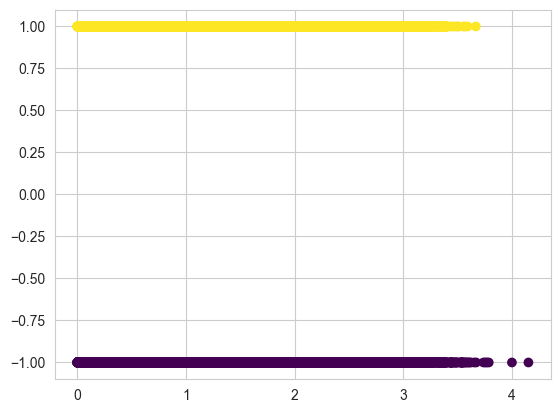

In [183]:
plt.scatter(considered_df['amt_transformed'], preds, c=preds, cmap='viridis')

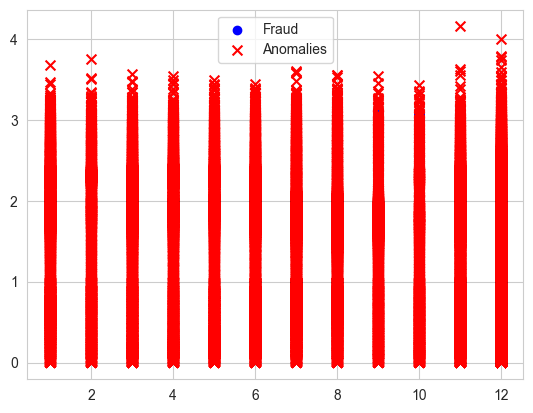

In [187]:
anomalies = considered_df[preds == -1]

plt.scatter(fraud['month'], fraud['amt_transformed'], color='blue', label='Fraud')

# plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies['month'], anomalies['amt_transformed'], c='r', marker='x', s=50, label='Anomalies')
# plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

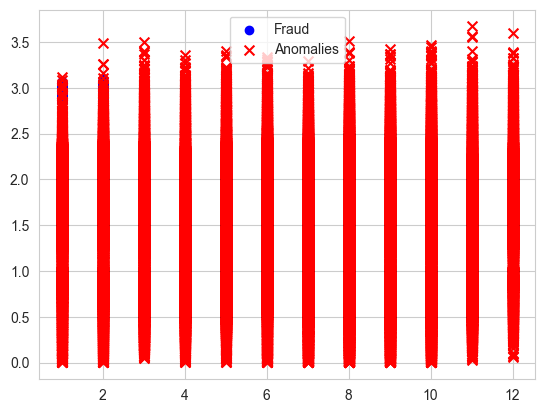

In [189]:
anomalies = considered_df[preds == 1]

plt.scatter(fraud['month'], fraud['amt_transformed'], color='blue', label='Fraud')

# plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies['month'], anomalies['amt_transformed'], c='r', marker='x', s=50, label='Anomalies')
# plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

In [191]:
considered_df

,month,day,hour,minute,second,amt_transformed,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
3250082,1,1,0,0,11,1.872745,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
108802,1,1,0,0,22,0.550351,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3002999,1,1,0,0,32,1.615013,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3823956,1,1,0,0,52,1.623983,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1383654,1,1,0,1,12,0.613947,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139714,12,31,23,57,42,1.333870,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3512675,12,31,23,58,50,1.406727,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3730952,12,31,23,59,10,1.236562,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1961076,12,31,23,59,15,1.939025,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [199]:
test_df = considered_df.copy()

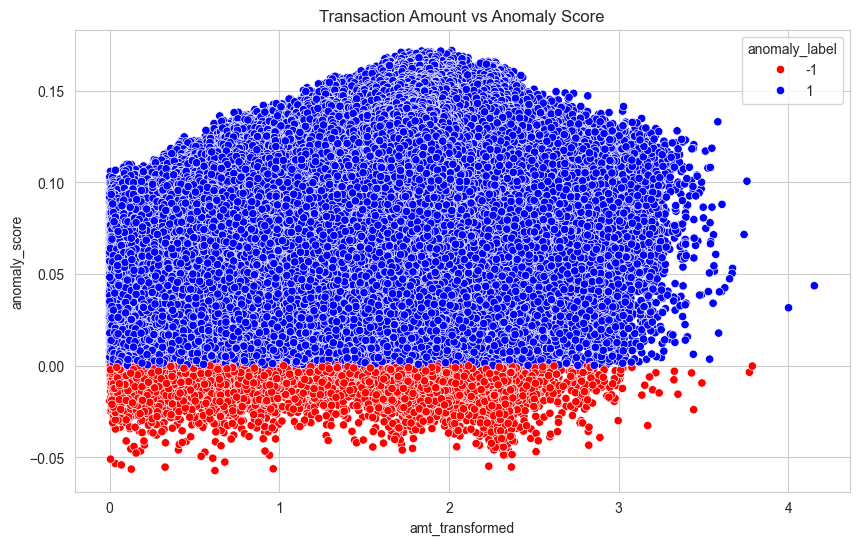

         month  day  hour  minute  second  amt_transformed  \
108802       1    1     0       0      22         0.550351   
1383654      1    1     0       1      12         0.613947   
2863596      1    1     0       2       7         2.021235   
3504633      1    1     0       2      48         2.022061   
3645087      1    1     0       4      23         2.472260   
...        ...  ...   ...     ...     ...              ...   
528930      12   31    23      54       6         2.329074   
1949942     12   31    23      56      25         2.297062   
356259      12   31    23      57       0         2.249885   
139714      12   31    23      57      42         1.333870   
1961076     12   31    23      59      15         1.939025   

         category_entertainment  category_food_dining  category_gas_transport  \
108802                    False                 False                    True   
1383654                   False                 False                    True   
2863596     

In [202]:
# Feature selection
# features = ['amt', 'hour', 'minute', 'second']
# X = test_df[features]
X = considered_df

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomaly scores and labels
test_df['anomaly_score'] = model.decision_function(X)
test_df['anomaly_label'] = model.predict(X)

# Analyze results
anomalies = test_df[test_df['anomaly_label'] == -1]

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='amt_transformed', y='anomaly_score', hue='anomaly_label', palette={1: 'blue', -1: 'red'})
plt.title('Transaction Amount vs Anomaly Score')
plt.show()

# Print anomalies
print(anomalies)

In [ ]:
resampled_df[] = resampled_df

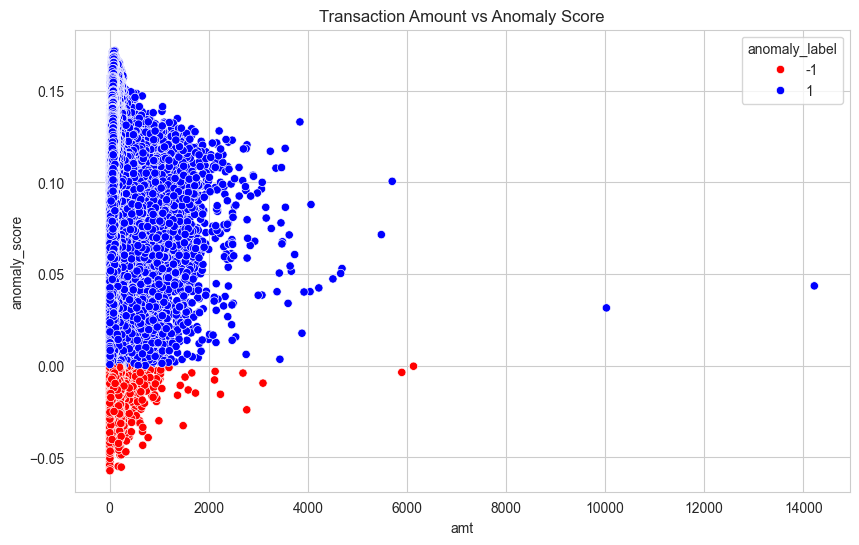

In [204]:
# # Predict anomaly scores and labels
# test_df['anomaly_score'] = model.decision_function(X)
# test_df['anomaly_label'] = model.predict(X)
resampled_df['anomaly_score'] = test_df['anomaly_score'] 
resampled_df['anomaly_label'] = test_df['anomaly_label'] 

# Analyze results
anomalies = resampled_df[resampled_df['anomaly_label'] == -1]

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resampled_df, x='amt', y='anomaly_score', hue='anomaly_label', palette={1: 'blue', -1: 'red'})
plt.title('Transaction Amount vs Anomaly Score')
plt.show()


In [206]:
anomalies.shape

(8603, 35)

In [215]:
anomalies[(anomalies["is_fraud"] == 0 )& (anomalies['anomaly_score']<0)]

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,...,year,month,day,hour,minute,second,amt_transformed,transaction_duration,anomaly_score,anomaly_label
108802,93003,3515727919409615,594076940942,415673c00158c5a991f41fc21140670b,1546300822,gas_transport,3.55,0,Lewis-Herrera,36.154814,...,2019,1,1,0,0,22,0.550351,NaN,-0.008017,-1
1383654,926698,4726282968244854,303359320618,69000df415ef63fe815cc38ae0e574e8,1546300872,gas_transport,4.11,0,Smith Inc,28.926321,...,2019,1,1,0,1,12,0.613947,NaN,-0.011527,-1
2863596,4005391,213114578870711,790546631667,d6955a8c94b6b256a4daf331d22fb4ed,1546300927,gas_transport,105.01,0,Robinson-Nolan,26.214709,...,2019,1,1,0,2,7,2.021235,NaN,-0.002847,-1
3504633,4098041,60454932967,259345477235,28661984304bb84b3bbd6ea023bc70dc,1546300968,gas_transport,105.21,0,Mitchell-Valenzuela,42.186612,...,2019,1,1,0,2,48,2.022061,NaN,-0.003268,-1
3645087,2671183,6011739970469471,347920342513,728a9c7ed5197330cb2198c87eb3d077,1546301063,gas_transport,296.66,0,Austin and Sons,38.632348,...,2019,1,1,0,4,23,2.472260,NaN,-0.005775,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528930,556632,6011630702867209,642285306665,e6512da253f1d235496123590fdb70d5,1577836446,misc_pos,213.34,0,Cooper Inc,28.749757,...,2019,12,31,23,54,6,2.329074,20027.0,-0.026592,-1
1949942,1416776,3583354883571929,962171225531,a411e51e527eb926eeccca2943bb6028,1577836585,misc_pos,198.18,0,Pittman PLC,43.570542,...,2019,12,31,23,56,25,2.297062,17247.0,-0.026279,-1
356259,3627071,3582761539669587,335764110674,ad1c98e1725a13e538dc54709ad0a9a9,1577836620,misc_pos,177.78,0,Phillips-Ward,43.861739,...,2019,12,31,23,57,0,2.249885,10238.0,-0.042388,-1
139714,3451729,3508835615951480,917181406434,915be38f8bb2c759848452d96e1114b0,1577836662,misc_pos,21.57,0,Thomas Ltd,32.146188,...,2019,12,31,23,57,42,1.333870,84355.0,-0.017306,-1


In [214]:
anomalies["is_fraud"].value_counts()

is_fraud
0    8590
1      13
Name: count, dtype: int64

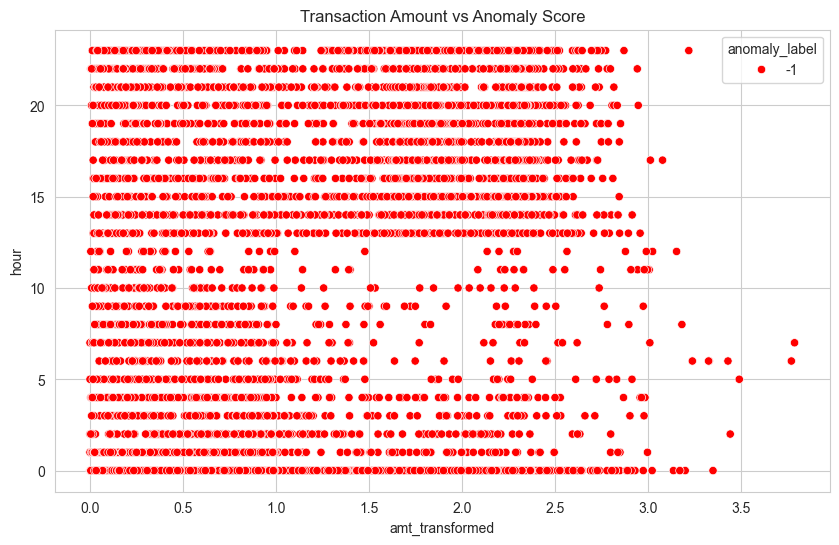

In [248]:
# Solution
